# Pre. 필요한 Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy.stats as stats

In [2]:
# 한글 폰트 설정
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# I. 전체 데이터셋에 대한 EDA

# A. Data Import

In [3]:
data = pd.read_excel("boxoffice_total.xlsx")

In [4]:
data.head()

,영화명,개봉일,배우 언급수,감독 평점,원작유무,상영시간,상영등급,시리즈,평론가 평점,장르,인스타,블로그,X(트위터),총 언급수,조회수,관객수
0,셜록: 유령신부,2016-01-02,26,6.5,1,115,12세이상관람가,1,6.50,범죄,4,26,33,63,479334,1278894
1,나를 잊지 말아요,2016-01-07,81,3.8,0,106,15세이상관람가,0,3.75,멜로/로맨스,9,7,32,48,1021854,425799
2,굿 다이노,2016-01-07,0,6.7,0,101,전체관람가,0,6.00,애니메이션,5,7,42,54,444148,1328394
3,레버넌트: 죽음에서 돌아온 자,2016-01-14,78,6.8,0,156,15세이상관람가,0,6.88,어드벤처,7,13,154,174,798074,2007180
4,그날의 분위기,2016-01-14,206,5.6,0,103,15세이상관람가,0,5.00,멜로/로맨스,8,8,46,62,296139,652453


In [5]:
# 데이터 형태 출력
print("\nShape of the Data:", data.shape)


Shape of the Data: (936, 16)


In [6]:
# 각 열의 데이터 타입 출력
print("\nData Types:\n", data.dtypes)


Data Types:
 영화명               object
개봉일       datetime64[ns]
배우 언급수             int64
감독 평점            float64
원작유무               int64
상영시간               int64
상영등급              object
시리즈                int64
평론가 평점           float64
장르                object
인스타                int64
블로그                int64
X(트위터)             int64
총 언급수              int64
조회수                int64
관객수                int64
dtype: object


In [7]:
# 결측치 확인

#: 각 열의 결측치 수를 확인
print('-----------각 열의 결측치 수-----------')
print(data.isnull().sum())

# 결측치가 아닌 값의 수를 확인
print('\n-----------각 열의 결측치가 아닌 값의 수-----------')
print(data.notnull().sum())

# 결측치와 결측치가 아닌 값의 총 계수 계산
print('\n-----------결측치와 결측치가 아닌 값의 총 계수-----------')
print(f'결측치 값의 총 수: {data.isnull().sum().sum()}')
print(f'결측치가 아닌 값의 총 수: {data.notnull().sum().sum()}')

-----------각 열의 결측치 수-----------
영화명       0
개봉일       0
배우 언급수    0
감독 평점     0
원작유무      0
상영시간      0
상영등급      0
시리즈       0
평론가 평점    0
장르        0
인스타       0
블로그       0
X(트위터)    0
총 언급수     0
조회수       0
관객수       0
dtype: int64

-----------각 열의 결측치가 아닌 값의 수-----------
영화명       936
개봉일       936
배우 언급수    936
감독 평점     936
원작유무      936
상영시간      936
상영등급      936
시리즈       936
평론가 평점    936
장르        936
인스타       936
블로그       936
X(트위터)    936
총 언급수     936
조회수       936
관객수       936
dtype: int64

-----------결측치와 결측치가 아닌 값의 총 계수-----------
결측치 값의 총 수: 0
결측치가 아닌 값의 총 수: 14976


In [8]:
# 기술 통계
# 수치형 변수의 기술 통계
print('-----------기술 통계-----------')
print(data.describe())

-----------기술 통계-----------
            배우 언급수       감독 평점        원작유무        상영시간         시리즈  \
count   936.000000  936.000000  936.000000  936.000000  936.000000   
mean     47.831197    5.751816    0.399573  112.360043    0.284188   
std      90.445903    1.316955    0.490072   20.010256    0.451268   
min       0.000000    0.000000    0.000000   45.000000    0.000000   
25%       0.000000    5.200000    0.000000  100.000000    0.000000   
50%      14.000000    6.000000    0.000000  110.500000    0.000000   
75%      64.000000    6.500000    1.000000  124.000000    1.000000   
max    1090.000000    8.400000    1.000000  205.000000    1.000000   

           평론가 평점          인스타          블로그        X(트위터)         총 언급수  \
count  936.000000   936.000000   936.000000    936.000000    936.000000   
mean     5.542190    23.993590    16.309829    247.602564    284.485043   
std      1.768736    68.314247   130.743952   1170.168011   1193.922025   
min      0.000000     0.000000     0.0000

# B. 전체 데이터에 대한  시각화

## B-1. 월별 관객수 추이 그래프

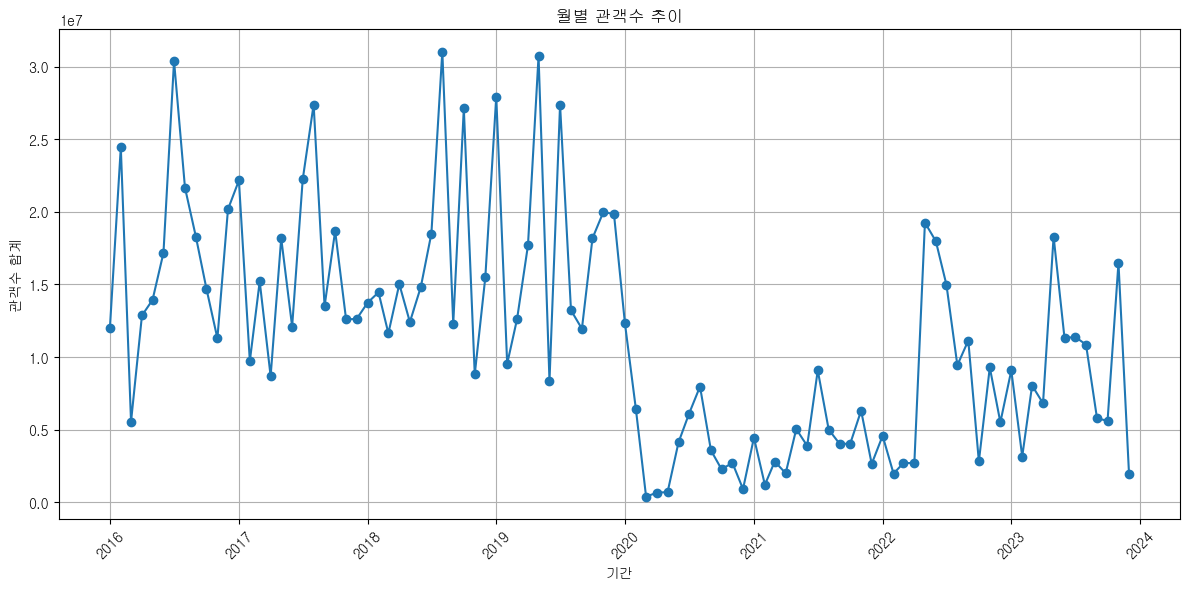

In [9]:
data['개봉일'] = pd.to_datetime(data['개봉일'])

monthly_audience = data.groupby(data['개봉일'].dt.to_period('M')).sum(numeric_only=True)['관객수']
monthly_audience.index = monthly_audience.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_audience.index, monthly_audience.values, marker='o', linestyle='-')
plt.title('월별 관객수 추이')
plt.xlabel('기간')
plt.ylabel('관객수 합계')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## B-2. 월별 관객수 누적 그래프

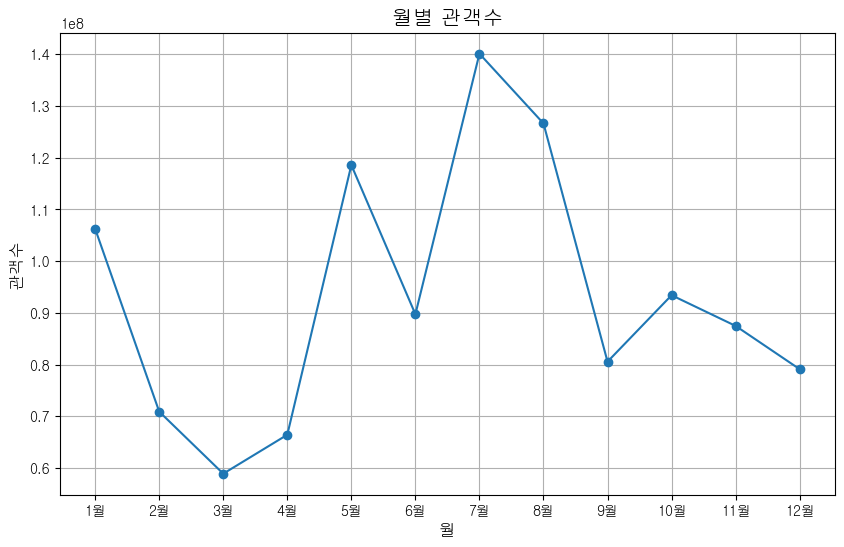

In [10]:
data['개봉월'] = data['개봉일'].dt.month

monthly_data = data.groupby('개봉월')['관객수'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-')
plt.title('월별 관객수', fontsize=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('관객수', fontsize=12)
plt.xticks(range(1, 13), ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.grid(True)
plt.show()

## B-3. 상영등급 & 장르 히스토그램

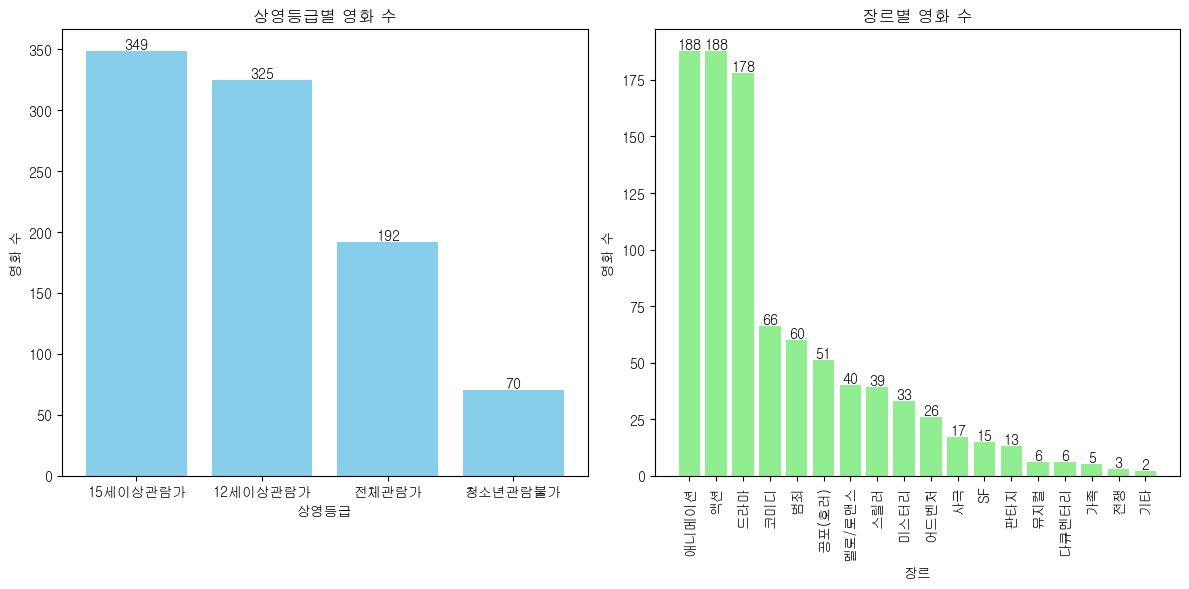

In [11]:
rating_counts = data['상영등급'].value_counts()
genres_counts = data['장르'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('상영등급별 영화 수')
plt.xlabel('상영등급')
plt.ylabel('영화 수')

for bar, count in zip(bars, rating_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars = plt.bar(genres_counts.index, genres_counts.values, color='lightgreen')
plt.title('장르별 영화 수')
plt.xlabel('장르')
plt.ylabel('영화 수')
plt.xticks(rotation=90)

for bar, count in zip(bars, genres_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# II. 애니메이션 제외한 영화에 대한 EDA

# A. Data Import

In [12]:
data = pd.read_excel("boxoffice_data.xlsx")

In [13]:
data.head()

,영화명,개봉일,배우 언급수,감독 평점,원작유무,상영시간,상영등급,시리즈,평론가 평점,장르,인스타,블로그,X(트위터),총 언급수,조회수,관객수
0,셜록: 유령신부,2016-01-02,26,6.5,1,115,12세이상관람가,1,6.50,범죄,4,26,33,63,479334,1278894
1,나를 잊지 말아요,2016-01-07,81,3.8,0,106,15세이상관람가,0,3.75,멜로/로맨스,9,7,32,48,1021854,425799
2,레버넌트: 죽음에서 돌아온 자,2016-01-14,78,6.8,0,156,15세이상관람가,0,6.88,어드벤처,7,13,154,174,798074,2007180
3,그날의 분위기,2016-01-14,206,5.6,0,103,15세이상관람가,0,5.00,멜로/로맨스,8,8,46,62,296139,652453
4,구스범스,2016-01-14,0,5.1,1,103,12세이상관람가,1,6.00,액션,3,6,12,21,354947,297356


In [14]:
# 데이터 형태 출력
print("\nShape of the Data:", data.shape)


Shape of the Data: (748, 16)


In [15]:
# 결측치 확인

#: 각 열의 결측치 수를 확인
print('-----------각 열의 결측치 수-----------')
print(data.isnull().sum())

# 결측치가 아닌 값의 수를 확인
print('\n-----------각 열의 결측치가 아닌 값의 수-----------')
print(data.notnull().sum())

# 결측치와 결측치가 아닌 값의 총 계수 계산
print('\n-----------결측치와 결측치가 아닌 값의 총 계수-----------')
print(f'결측치 값의 총 수: {data.isnull().sum().sum()}')
print(f'결측치가 아닌 값의 총 수: {data.notnull().sum().sum()}')

-----------각 열의 결측치 수-----------
영화명       0
개봉일       0
배우 언급수    0
감독 평점     0
원작유무      0
상영시간      0
상영등급      0
시리즈       0
평론가 평점    0
장르        0
인스타       0
블로그       0
X(트위터)    0
총 언급수     0
조회수       0
관객수       0
dtype: int64

-----------각 열의 결측치가 아닌 값의 수-----------
영화명       748
개봉일       748
배우 언급수    748
감독 평점     748
원작유무      748
상영시간      748
상영등급      748
시리즈       748
평론가 평점    748
장르        748
인스타       748
블로그       748
X(트위터)    748
총 언급수     748
조회수       748
관객수       748
dtype: int64

-----------결측치와 결측치가 아닌 값의 총 계수-----------
결측치 값의 총 수: 0
결측치가 아닌 값의 총 수: 11968


In [16]:
# 기술 통계
# 수치형 변수의 기술 통계
print('-----------기술 통계-----------')
print(data.describe())

-----------기술 통계-----------
            배우 언급수       감독 평점        원작유무        상영시간         시리즈  \
count   748.000000  748.000000  748.000000  748.000000  748.000000   
mean     59.852941    5.849064    0.336898  116.933155    0.207219   
std      97.564161    1.052968    0.472966   18.228898    0.405585   
min       0.000000    0.000000    0.000000   72.000000    0.000000   
25%       7.000000    5.200000    0.000000  105.000000    0.000000   
50%      24.000000    6.000000    0.000000  115.000000    0.000000   
75%      80.000000    6.500000    1.000000  127.000000    0.000000   
max    1090.000000    8.400000    1.000000  205.000000    1.000000   

           평론가 평점         인스타         블로그        X(트위터)         총 언급수  \
count  748.000000  748.000000  748.000000    748.000000    748.000000   
mean     5.761818   26.171123   13.866310    284.094920    324.647059   
std      1.338633   63.413457   40.851817   1296.082242   1317.229200   
min      0.000000    0.000000    0.000000      0.

# B. 단변량 분석 및 두 변수들 간의 관계

## B-1. 상영등급에 따른 영화수

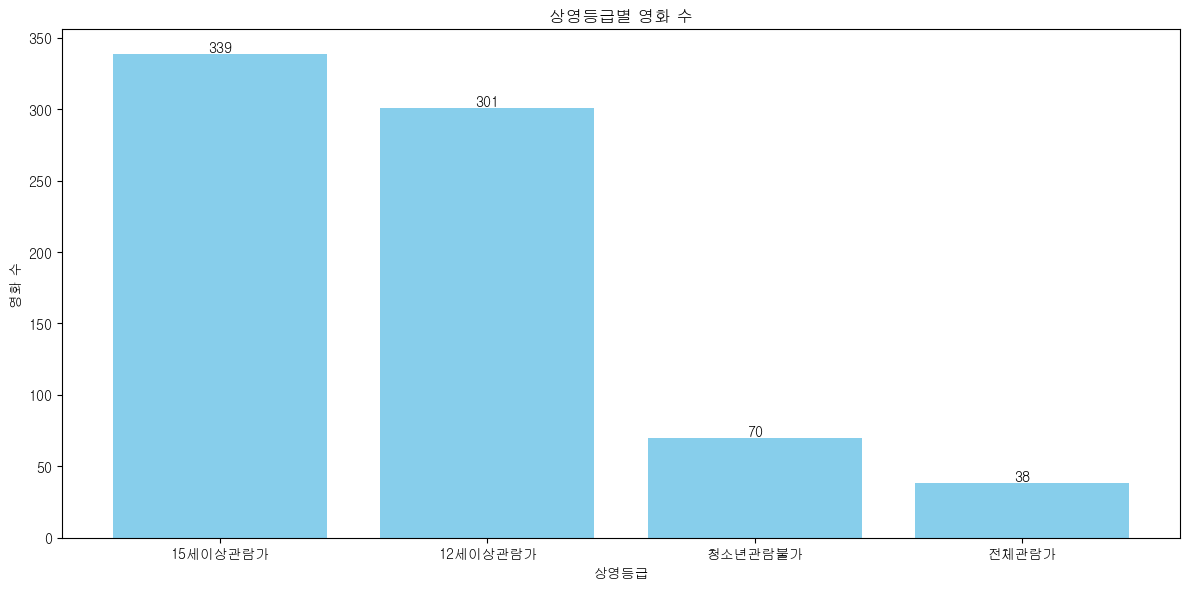

In [17]:
rating_counts = data['상영등급'].value_counts()

plt.figure(figsize=(12, 6))

bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('상영등급별 영화 수')
plt.xlabel('상영등급')
plt.ylabel('영화 수')

for bar, count in zip(bars, rating_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## B-2. 상영등급에 따른 평균 관객수

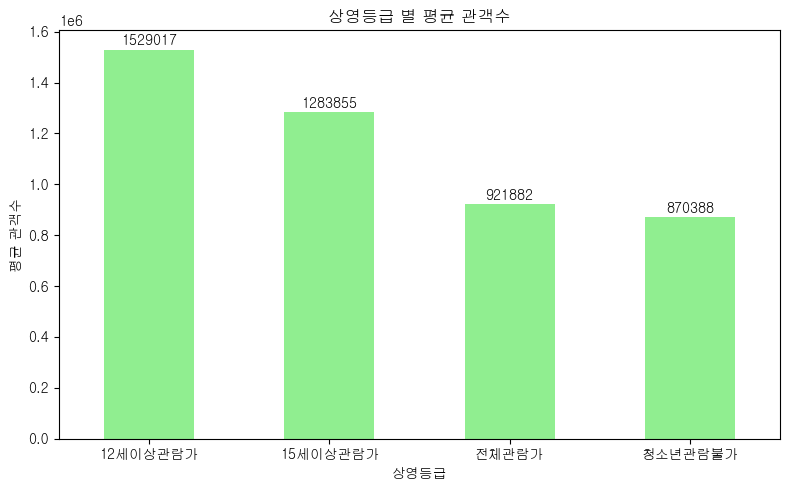

In [18]:
rating_mean_audience = data.groupby('상영등급')['관객수'].mean().sort_index()

plt.figure(figsize=(8, 5))
rating_mean_audience.plot(kind='bar', color='lightgreen')
plt.title('상영등급 별 평균 관객수')
plt.xlabel('상영등급')
plt.ylabel('평균 관객수')
plt.xticks(rotation=0)
plt.tight_layout()

for i, v in enumerate(rating_mean_audience):
    plt.text(i, v + 10000, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.show()

## B-3. 장르별 관객수

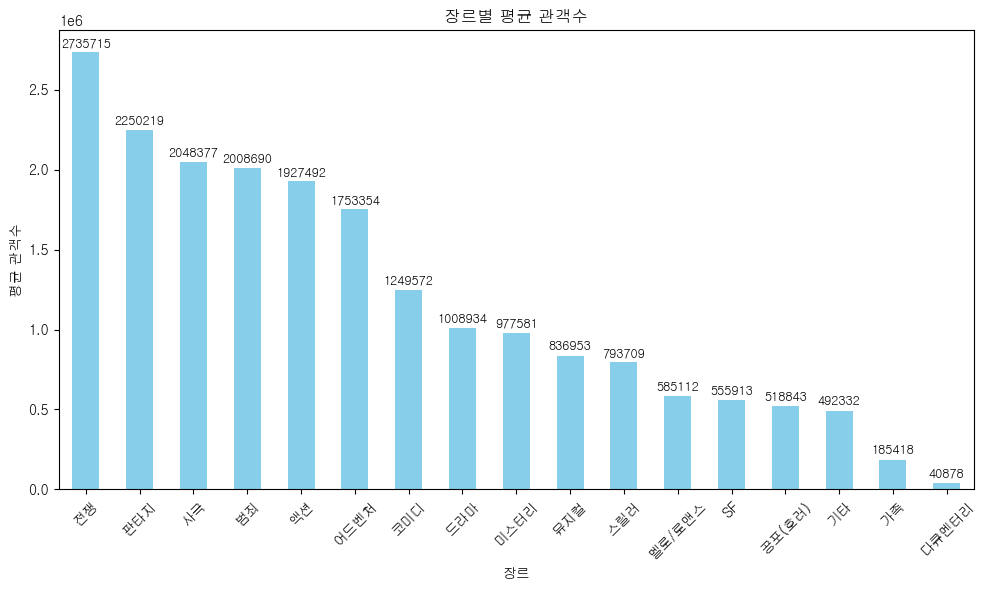

In [19]:
genre_mean_audience = data.groupby('장르')['관객수'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_mean_audience.plot(kind='bar', color='skyblue')
plt.title('장르별 평균 관객수')
plt.xlabel('장르')
plt.ylabel('평균 관객수')
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(genre_mean_audience):
    plt.text(i, v + 20000, str(round(v)), ha='center', va='bottom', fontsize=9)

plt.show()

## B-4. 장르에 따른 평균 SNS 언급수

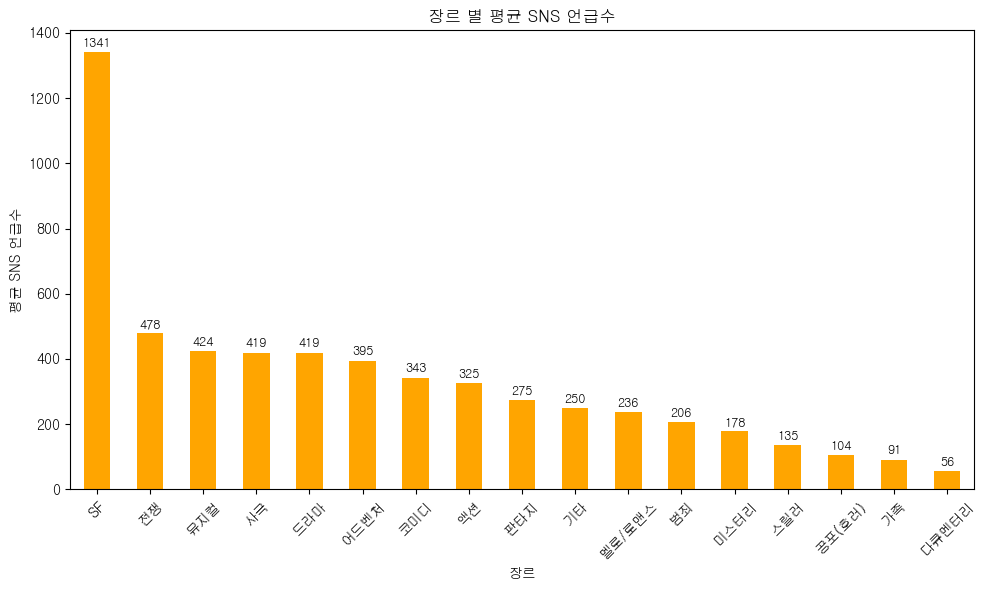

In [20]:
genre_mean_mentions = data.groupby('장르')['총 언급수'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_mean_mentions.plot(kind='bar', color='orange')
plt.title('장르 별 평균 SNS 언급수')
plt.xlabel('장르')
plt.ylabel('평균 SNS 언급수')
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(genre_mean_mentions):
    plt.text(i, v + 10, str(round(v)), ha='center', va='bottom', fontsize=9)

plt.show()

## B-5. 시리즈 & 원작 유무에 따른 평균 SNS 언급수

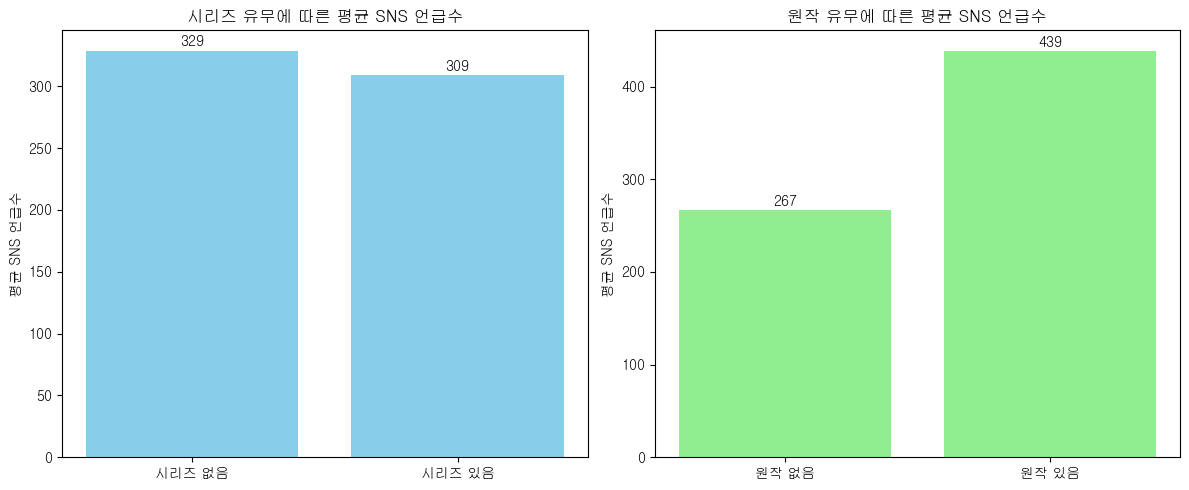

In [21]:
series_mean_mentions = data.groupby('시리즈')['총 언급수'].mean()

adaptation_mean_mentions = data.groupby('원작유무')['총 언급수'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['시리즈 없음', '시리즈 있음'], series_mean_mentions, color='skyblue')
ax1.set_title('시리즈 유무에 따른 평균 SNS 언급수')
ax1.set_ylabel('평균 SNS 언급수')

for i, v in enumerate(series_mean_mentions):
    ax1.text(i, v + 2, str(round(v)), ha='center', va='bottom', fontsize=10)

ax2.bar(['원작 없음', '원작 있음'], adaptation_mean_mentions, color='lightgreen')
ax2.set_title('원작 유무에 따른 평균 SNS 언급수')
ax2.set_ylabel('평균 SNS 언급수')

for i, v in enumerate(adaptation_mean_mentions):
    ax2.text(i, v + 2, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

## B-6. 시리즈 & 원작 유무에 따른 영화 수

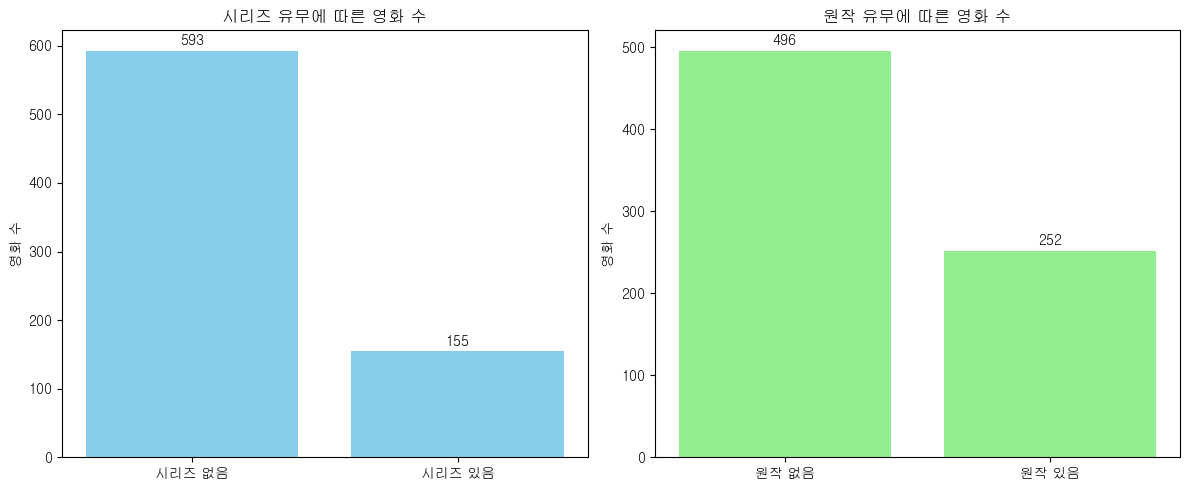

In [22]:
series_counts = data['시리즈'].value_counts()

adaptation_counts = data['원작유무'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['시리즈 없음', '시리즈 있음'], series_counts.values, color='skyblue')
ax1.set_title('시리즈 유무에 따른 영화 수')
ax1.set_ylabel('영화 수')

for i, v in enumerate(series_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

ax2.bar(['원작 없음', '원작 있음'], adaptation_counts.values, color='lightgreen')
ax2.set_title('원작 유무에 따른 영화 수')
ax2.set_ylabel('영화 수')

for i, v in enumerate(adaptation_counts.values):
    ax2.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

## B-7. 시리즈 & 원작 유무에 따른 평균 관객수

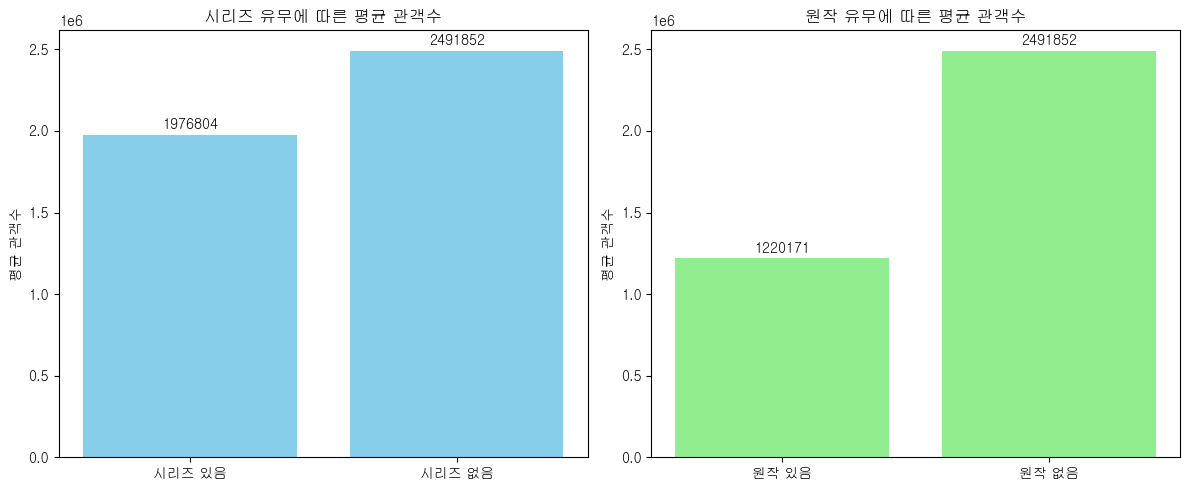

In [23]:
grouped = data.groupby(['시리즈', '원작유무'])['관객수'].mean().reset_index()

series_yes = grouped[grouped['시리즈'] == 1]['관객수']
series_no = grouped[grouped['시리즈'] == 0]['관객수']

adaptation_yes = grouped[grouped['원작유무'] == 1]['관객수']
adaptation_no = grouped[grouped['원작유무'] == 0]['관객수']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['시리즈 있음', '시리즈 없음'], series_yes, color='skyblue')
ax1.set_title('시리즈 유무에 따른 평균 관객수')
ax1.set_ylabel('평균 관객수')

for i, v in enumerate(series_yes):
    ax1.text(i, v + 20000, str(round(v)), ha='center', va='bottom', fontsize=10)

ax2.bar(['원작 있음', '원작 없음'], adaptation_yes, color='lightgreen')
ax2.set_title('원작 유무에 따른 평균 관객수')
ax2.set_ylabel('평균 관객수')

for i, v in enumerate(adaptation_yes):
    ax2.text(i, v + 20000, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

## B-8. 상영시간에 따른 관객수 그래프

- 단편 : 40분 미만
- 중편 : 40분 이상 80분 미만
- 장편 : 80분 이상 120분 미만
- 초장편 : 120분 이상

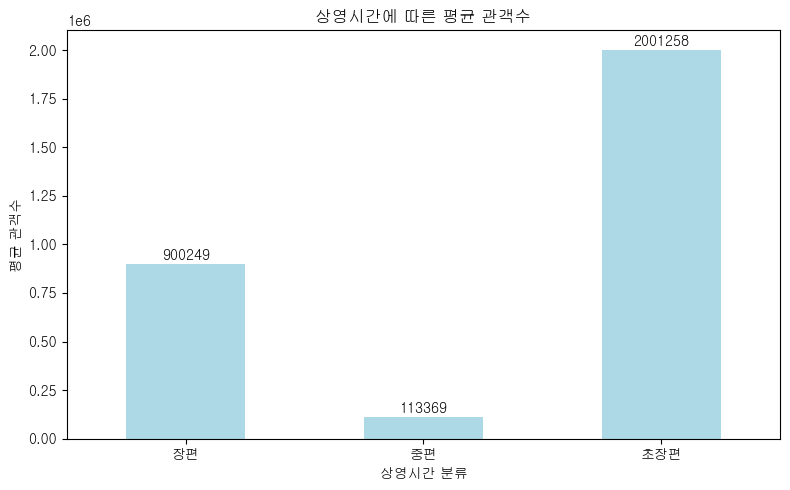

In [24]:
def classify_runtime_category(runtime):
    if runtime <= 40:
        return '단편'
    elif runtime > 40 and runtime <= 80:
        return '중편'
    elif runtime > 80 and runtime < 120:
        return '장편'
    else:
        return '초장편'

data['상영시간 분류'] = data['상영시간'].apply(classify_runtime_category)

runtime_mean_audience = data.groupby('상영시간 분류')['관객수'].mean()

plt.figure(figsize=(8, 5))
runtime_mean_audience.plot(kind='bar', color='lightblue')
plt.title('상영시간에 따른 평균 관객수')
plt.xlabel('상영시간 분류')
plt.ylabel('평균 관객수')
plt.xticks(rotation=0)
plt.tight_layout()

for i, v in enumerate(runtime_mean_audience):
    plt.text(i, v + 10000, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.show()

## B-9. SNS 언급수에 따른 관객수 산점도 그래프

### B-9-1. Total Scatter Plot

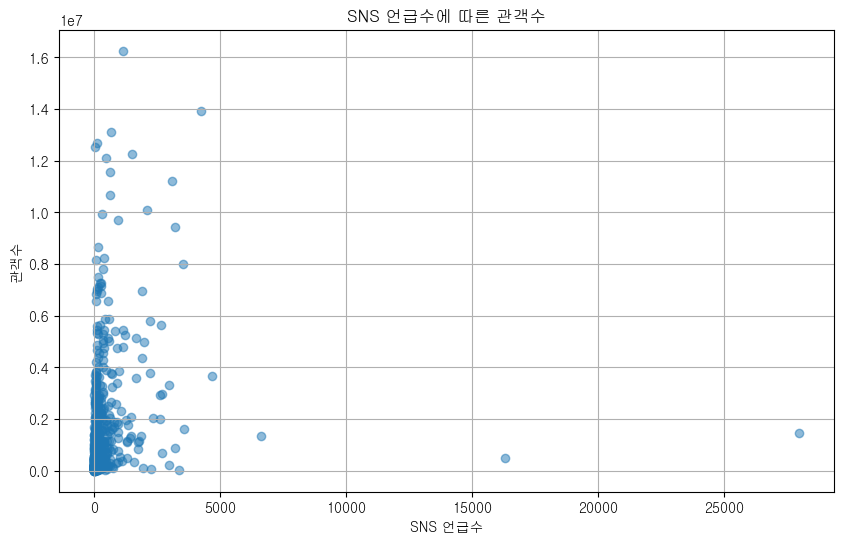

In [25]:
total_mentions = data['총 언급수']
audience_count = data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(total_mentions, audience_count, alpha=0.5)
plt.title('SNS 언급수에 따른 관객수')
plt.xlabel('SNS 언급수')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

### B-9-2. Q3 Scatter Plot

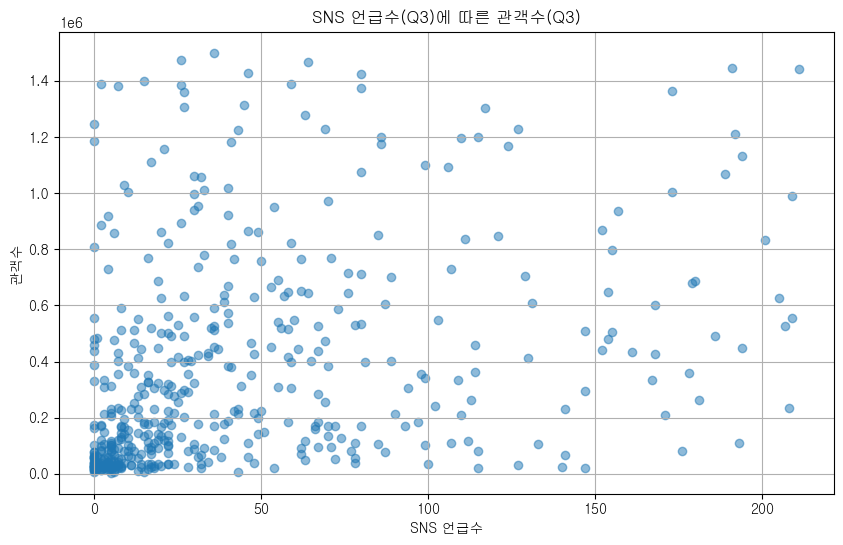

In [26]:
total_mentions = data['총 언급수']
audience_count = data['관객수']

filtered_data = data[(data['총 언급수'] <= 212) & (data['관객수'] <= 1539831)]
filtered_mentions = filtered_data['총 언급수']
filtered_audience = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_mentions, filtered_audience, alpha=0.5)
plt.title('SNS 언급수(Q3)에 따른 관객수(Q3)')
plt.xlabel('SNS 언급수')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

### B-9-3. Q2 Scatter Plot

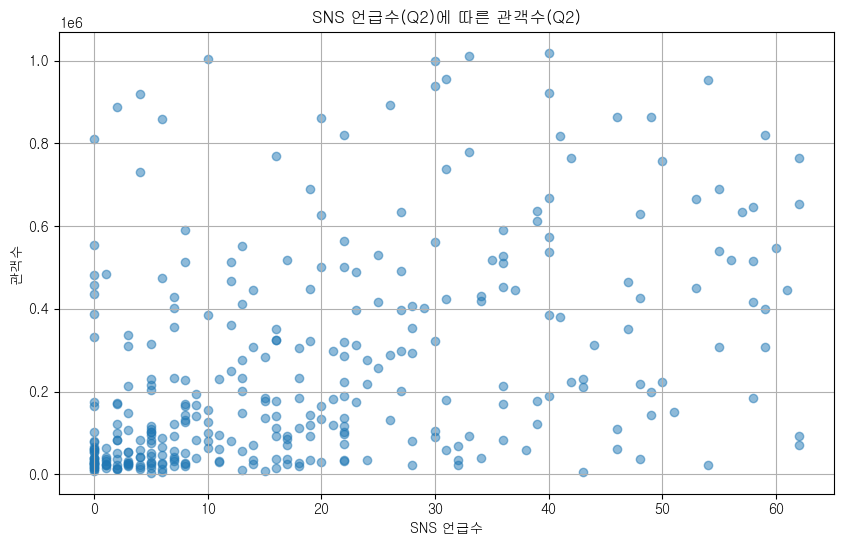

In [27]:
total_mentions = data['총 언급수']
audience_count = data['관객수']

filtered_data = data[(data['총 언급수'] <= 62) & (data['관객수'] <= 1028340)]
filtered_mentions = filtered_data['총 언급수']
filtered_audience = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_mentions, filtered_audience, alpha=0.5)
plt.title('SNS 언급수(Q2)에 따른 관객수(Q2)')
plt.xlabel('SNS 언급수')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

## B-10. 영화 작품성(평론가 평점)에 대한 관객수 산점도 그래프

### B-10-1. Total Scatter Plot

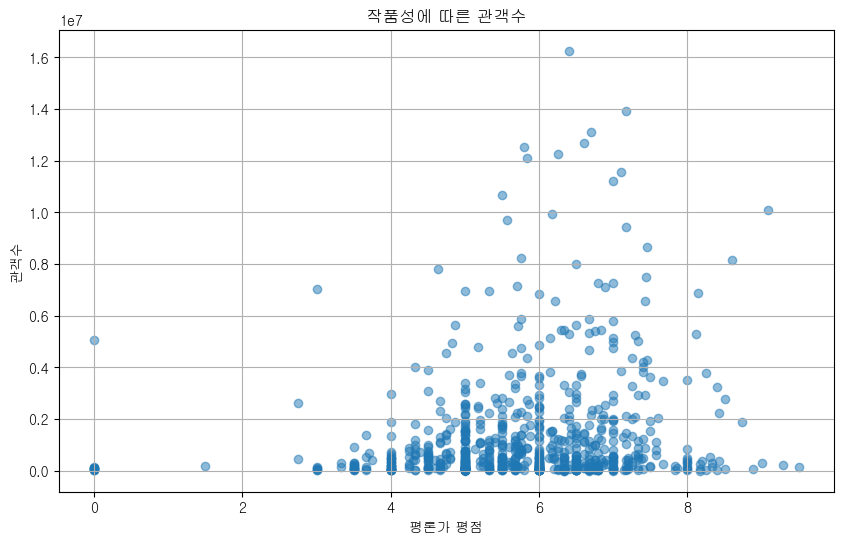

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data['평론가 평점'], data['관객수'], alpha=0.5)

plt.title('작품성에 따른 관객수')
plt.xlabel('평론가 평점')
plt.ylabel('관객수')

plt.grid(True)
plt.show()

### B-10-2. 평론가 평점(0점 제외)에 대한 관객수(Q3) Scatter Plot

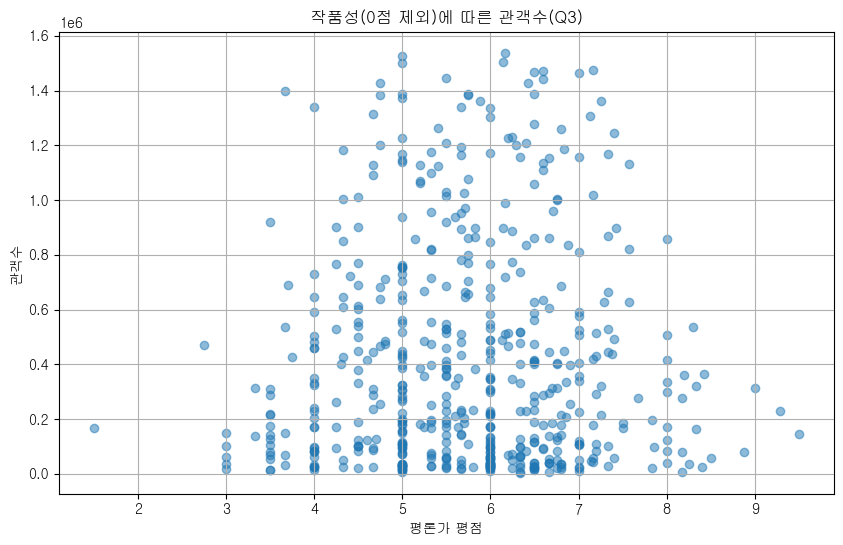

In [29]:
filtered_data = data[(data['평론가 평점'] >= 0.1)& (data['관객수'] <= 1.539831e+06)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['평론가 평점'], filtered_data['관객수'], alpha=0.5)

plt.title('작품성(0점 제외)에 따른 관객수(Q3)')
plt.xlabel('평론가 평점')
plt.ylabel('관객수')

plt.grid(True)
plt.show()

## B-11. 예고편 조회수에 따른 관객수

### B-11-1. Total Scatter Plot

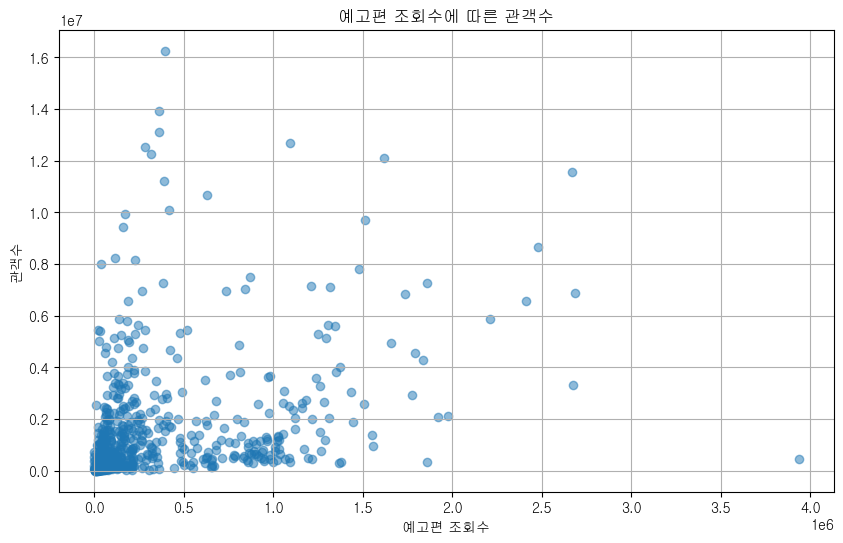

In [30]:
teaser_hit = data['조회수']
audience_count = data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit, audience_count, alpha=0.5)
plt.title('예고편 조회수에 따른 관객수')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()

### B-11-2. 예고편 조회수(Q3)에 대한 관객수(Q3) Scatter Plot

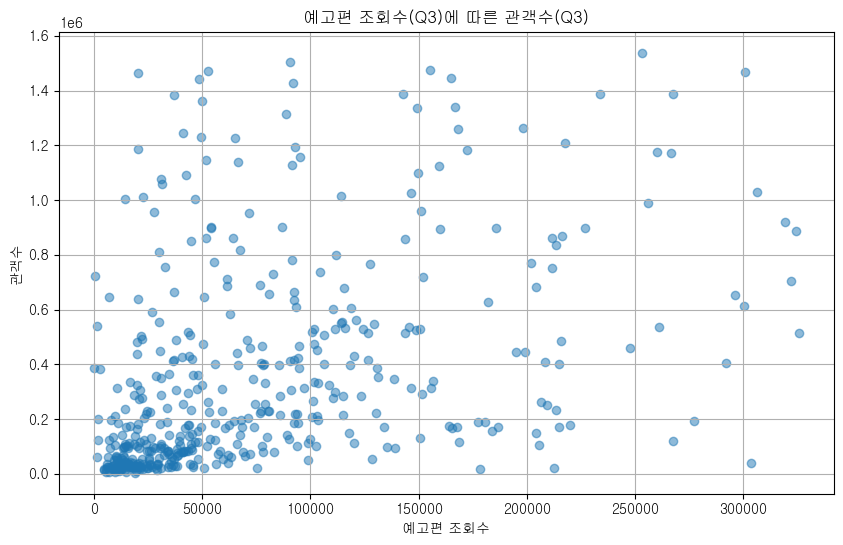

In [31]:
filtered_data = data[(data['조회수'] < 326136) & (data['관객수'] < 1539831)]

teaser_hit_filtered = filtered_data['조회수']
audience_count_filtered = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit_filtered, audience_count_filtered, alpha=0.5)
plt.title('예고편 조회수(Q3)에 따른 관객수(Q3)')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()

### B-11-3. 예고편 조회수(Q2)에 대한 관객수(Q2) Scatter Plot

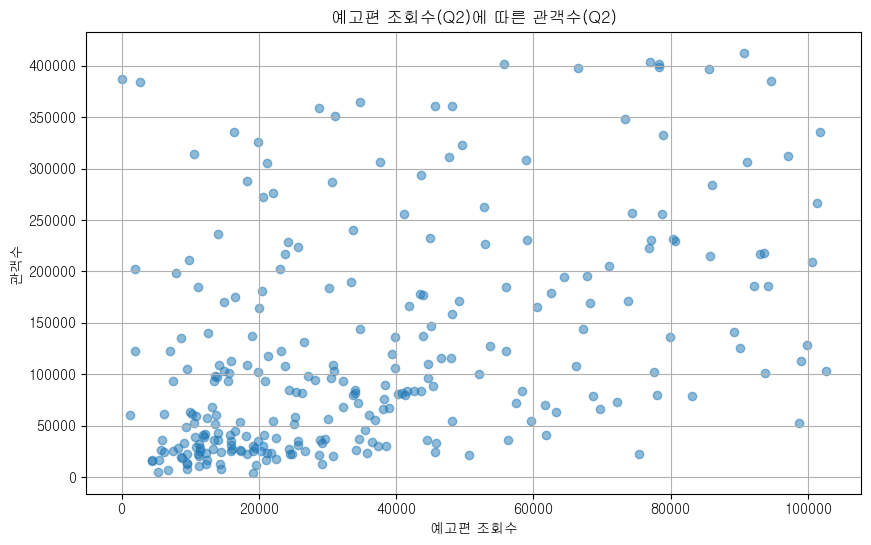

In [32]:
filtered_data = data[(data['조회수'] < 102834) & (data['관객수'] < 412843)]

teaser_hit_filtered = filtered_data['조회수']
audience_count_filtered = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit_filtered, audience_count_filtered, alpha=0.5)
plt.title('예고편 조회수(Q2)에 따른 관객수(Q2)')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()

## B-12. 배우 인지도(배우 언급수)에 따른 관객수 그래프

## B-12-1. Total Scatter

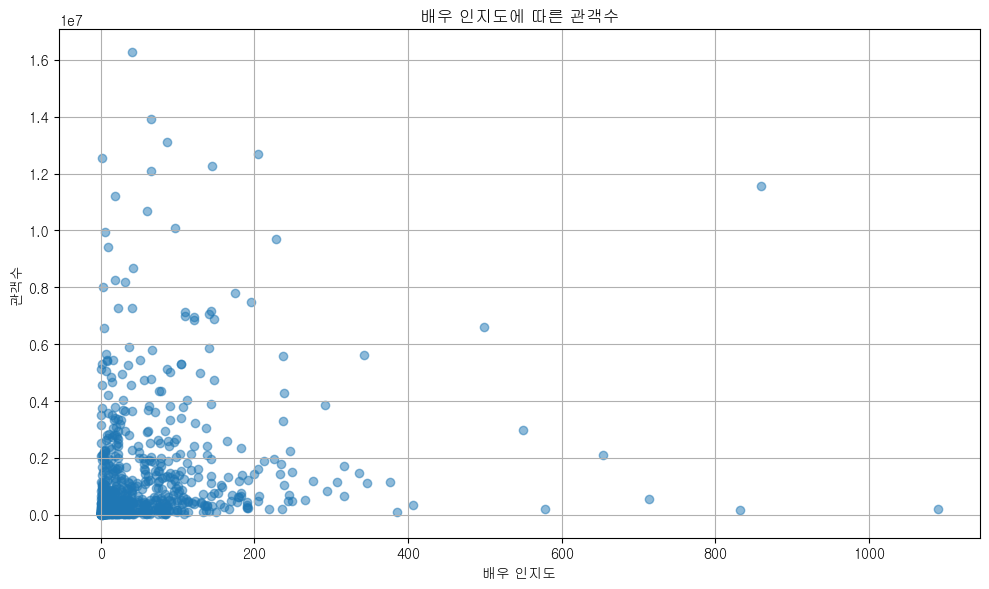

In [33]:
# 배우 언급수에 따른 관객수 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data['배우 언급수'], data['관객수'], alpha=0.5)
plt.title('배우 인지도에 따른 관객수')
plt.xlabel('배우 인지도')
plt.ylabel('관객수')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

### B-12-2. 배우 인지도(배우 언급수)(Q3)에 따른 관객수(Q3) 그래프

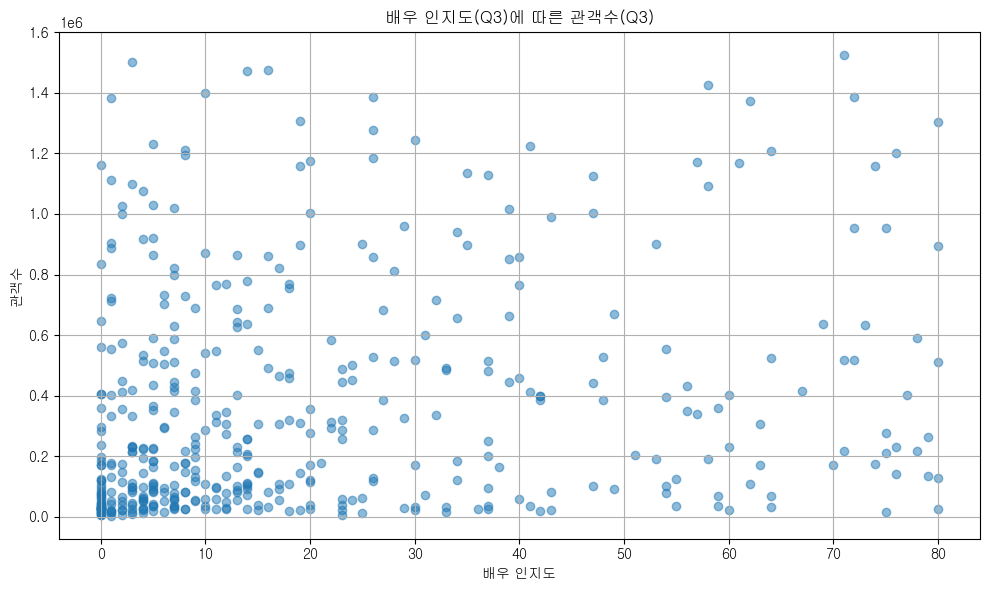

In [34]:
filtered_data = data[(data['배우 언급수'] <= 80) & (data['관객수'] <= 1539831)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['배우 언급수'], filtered_data['관객수'], alpha=0.5)
plt.title('배우 인지도(Q3)에 따른 관객수(Q3)')
plt.xlabel('배우 인지도')
plt.ylabel('관객수')
plt.grid(True)
plt.tight_layout()

plt.show()

## B-13. QQ Plot

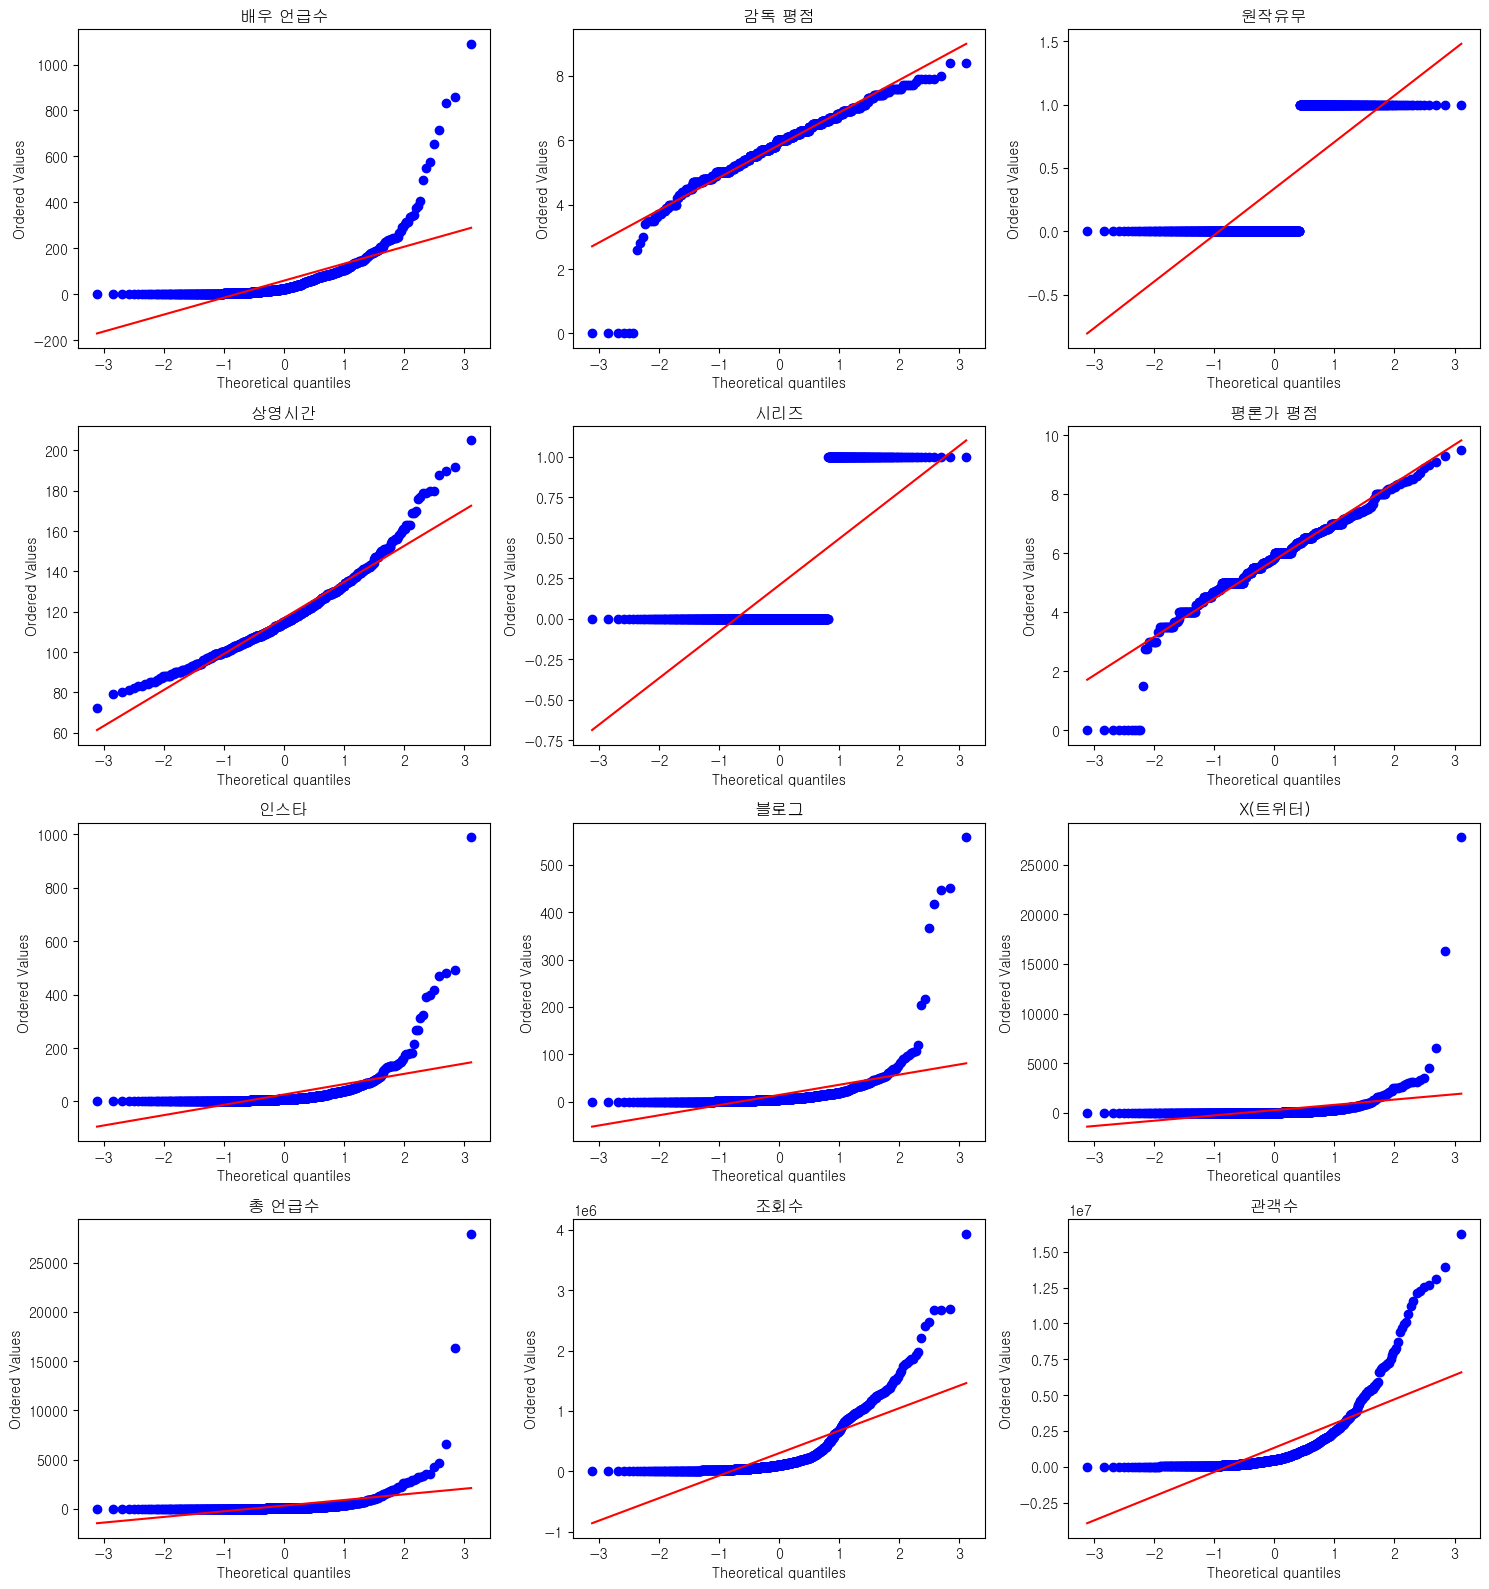

In [35]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

num_numeric_plots = len(numeric_data.columns)
num_rows = num_numeric_plots // 3 + (num_numeric_plots % 3 > 0)

plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(numeric_data.columns):
    plt.subplot(num_rows, 3, i + 1)
    stats.probplot(numeric_data[col].dropna(), dist="norm", plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()

## B-14. Box Plot

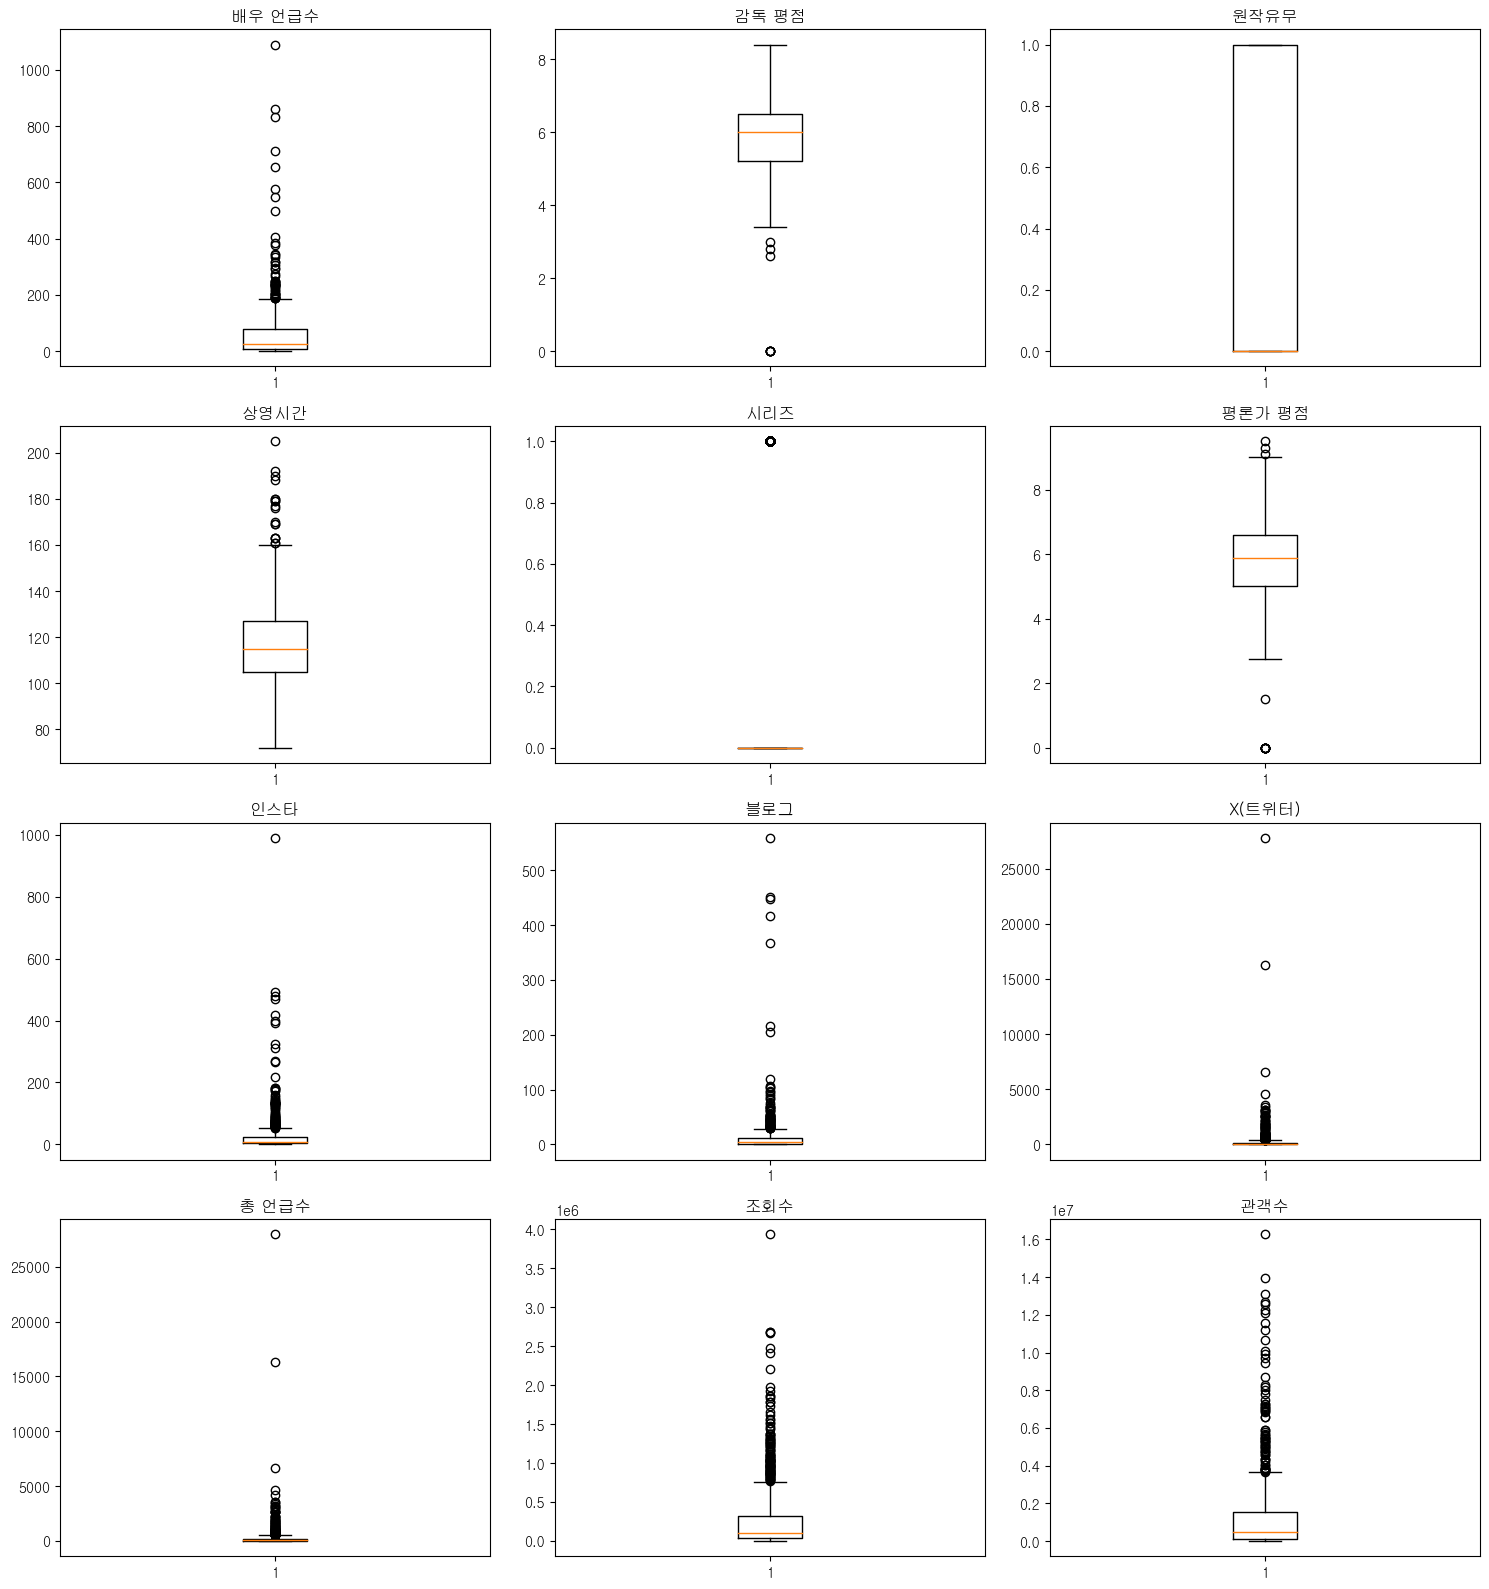

In [36]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

num_plots = len(numeric_data.columns)
rows = num_plots // 3 + (num_plots % 3 > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_data.columns):
    plt.subplot(rows, 3, i + 1)
    plt.boxplot(numeric_data[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

# C. 다변량 분석

In [37]:
data = pd.read_excel("data_encoded.xlsx")

## C-1. 산점도 행렬

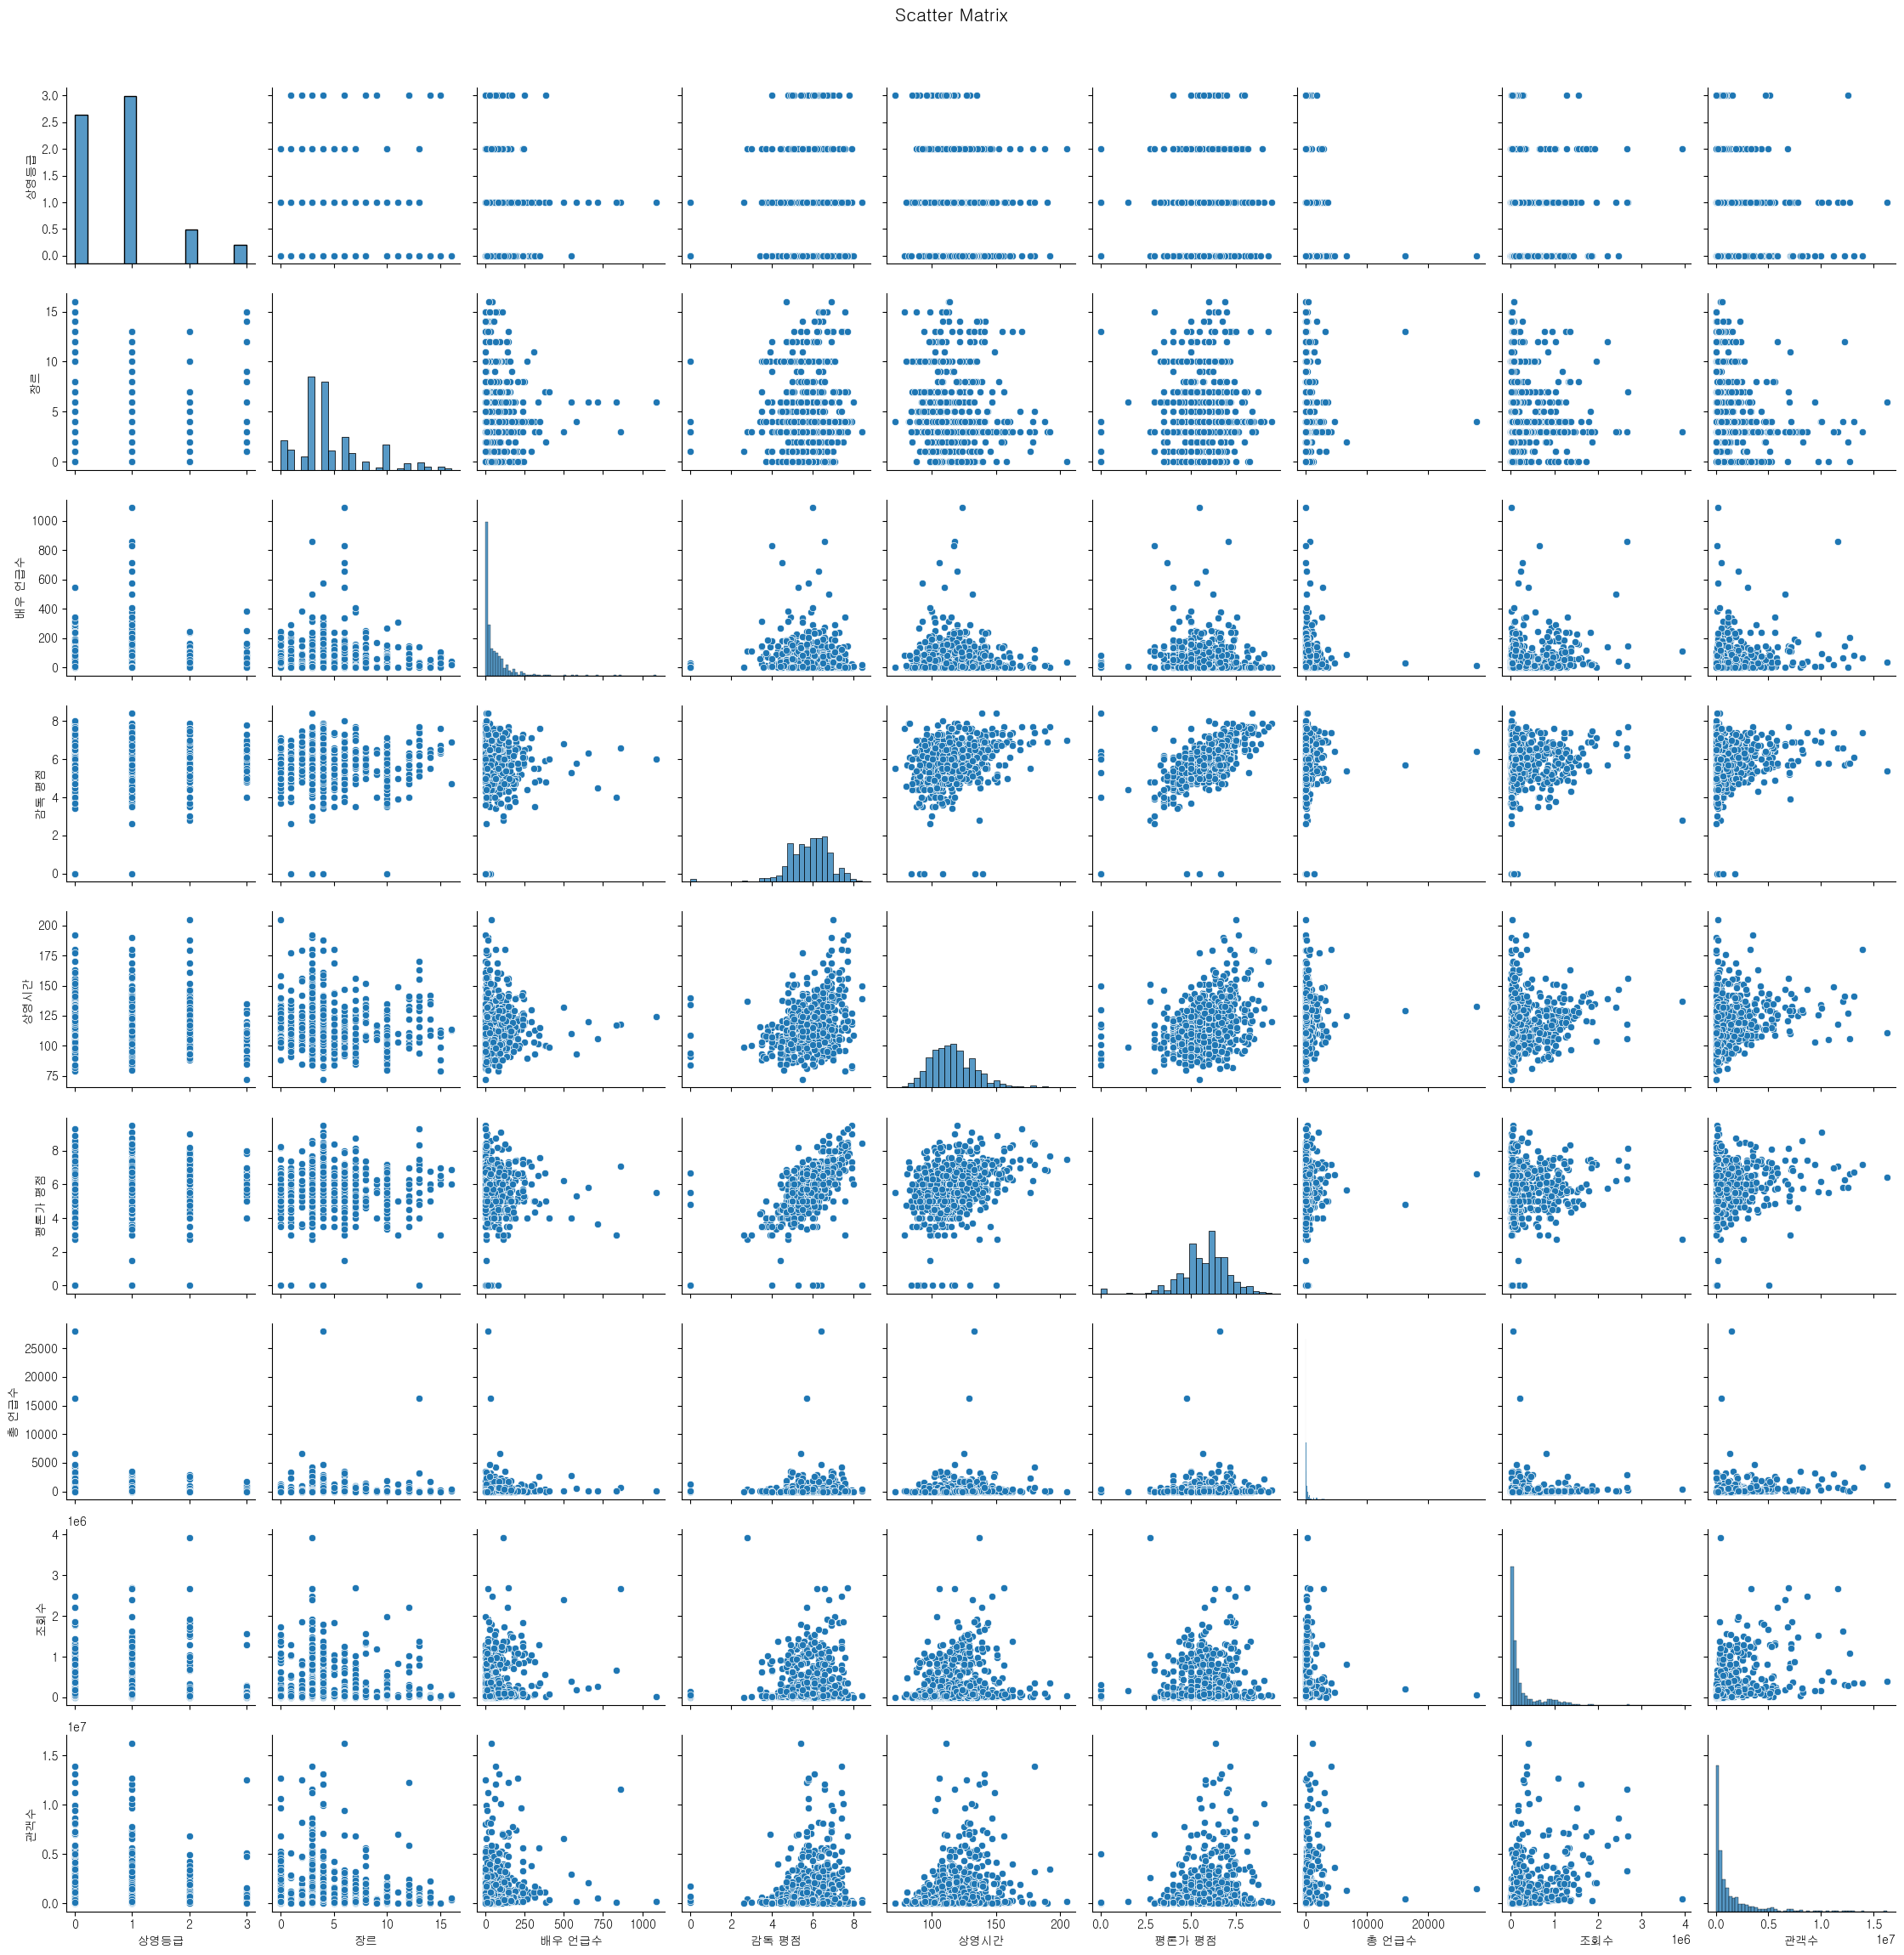

In [38]:
numeric_columns = ['상영등급', '장르', '배우 언급수', '감독 평점', '상영시간', '평론가 평점', '총 언급수', '조회수', '관객수']

sns.pairplot(data[numeric_columns])
plt.suptitle('Scatter Matrix', y=1.02, fontsize=15)
plt.tight_layout()

plt.show()

## C-2. 히트맵

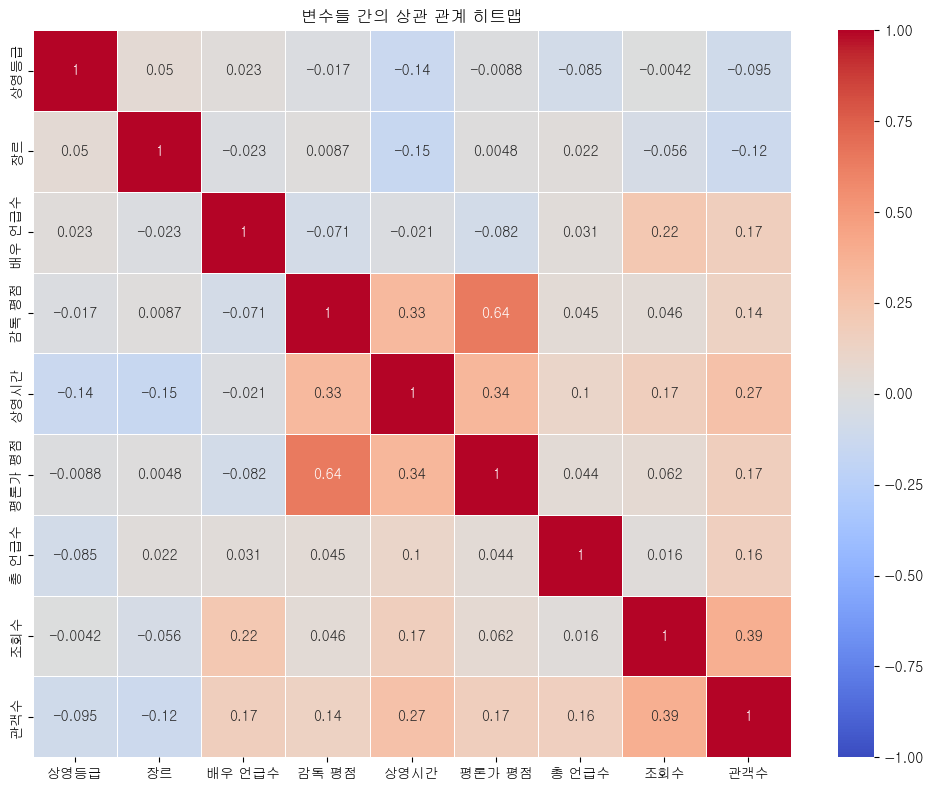

In [39]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('변수들 간의 상관 관계 히트맵')
plt.tight_layout()

plt.show()

# III. 애니메이션에 대한 시각화

# A. Data Import

In [40]:
data = pd.read_excel("boxoffice_animation.xlsx")
data.head()

,영화명,개봉일,감독 평점,원작유무,상영시간,상영등급,시리즈,평론가 평점,인스타,블로그,X(트위터),총 언급수,조회수,관객수
0,굿 다이노,2016-01-07,6.7,0,101,전체관람가,0,6.00,5,7,42,54,444148,1328394
1,쿵푸팬더3,2016-01-28,5.7,0,95,전체관람가,1,5.50,11,14,320,345,942185,3984812
2,앨빈과 슈퍼밴드: 악동 어드벤처,2016-02-04,4.8,1,92,전체관람가,1,3.00,2,4,5,11,557308,289645
3,주토피아,2016-02-17,6.8,0,108,전체관람가,1,7.25,7,8,160,175,873261,4703245
4,극장판 프랭키와 친구들: 생명의 나무,2016-04-13,0.0,1,72,전체관람가,1,0.00,0,1,0,1,28354,56835


In [41]:
# 데이터 형태 출력
print("\nShape of the Data:", data.shape)


Shape of the Data: (188, 14)


In [42]:
# 각 열의 데이터 타입 출력
print("\nData Types:\n", data.dtypes)


Data Types:
 영화명               object
개봉일       datetime64[ns]
감독 평점            float64
원작유무               int64
상영시간               int64
상영등급              object
시리즈                int64
평론가 평점           float64
인스타                int64
블로그                int64
X(트위터)             int64
총 언급수              int64
조회수                int64
관객수                int64
dtype: object


In [43]:
# 결측치 확인

#: 각 열의 결측치 수를 확인
print('-----------각 열의 결측치 수-----------')
print(data.isnull().sum())

# 결측치가 아닌 값의 수를 확인
print('\n-----------각 열의 결측치가 아닌 값의 수-----------')
print(data.notnull().sum())

# 결측치와 결측치가 아닌 값의 총 계수 계산
print('\n-----------결측치와 결측치가 아닌 값의 총 계수-----------')
print(f'결측치 값의 총 수: {data.isnull().sum().sum()}')
print(f'결측치가 아닌 값의 총 수: {data.notnull().sum().sum()}')

-----------각 열의 결측치 수-----------
영화명       0
개봉일       0
감독 평점     0
원작유무      0
상영시간      0
상영등급      0
시리즈       0
평론가 평점    0
인스타       0
블로그       0
X(트위터)    0
총 언급수     0
조회수       0
관객수       0
dtype: int64

-----------각 열의 결측치가 아닌 값의 수-----------
영화명       188
개봉일       188
감독 평점     188
원작유무      188
상영시간      188
상영등급      188
시리즈       188
평론가 평점    188
인스타       188
블로그       188
X(트위터)    188
총 언급수     188
조회수       188
관객수       188
dtype: int64

-----------결측치와 결측치가 아닌 값의 총 계수-----------
결측치 값의 총 수: 0
결측치가 아닌 값의 총 수: 2632


In [44]:
# 기술 통계
# 수치형 변수의 기술 통계
print('-----------기술 통계-----------')
print(data.describe())

-----------기술 통계-----------
            감독 평점        원작유무        상영시간         시리즈      평론가 평점  \
count  188.000000  188.000000  188.000000  188.000000  188.000000   
mean     5.364894    0.648936   94.164894    0.590426    4.668351   
std      2.013575    0.478577   16.067686    0.493068    2.742870   
min      0.000000    0.000000   45.000000    0.000000    0.000000   
25%      5.150000    0.000000   85.000000    0.000000    4.000000   
50%      6.000000    1.000000   94.000000    1.000000    6.000000   
75%      6.400000    1.000000  104.250000    1.000000    6.347500   
max      8.100000    1.000000  140.000000    1.000000    9.600000   

               인스타          블로그       X(트위터)        총 언급수            조회수  \
count   188.000000   188.000000   188.000000   188.000000     188.000000   
mean     15.329787    26.031915   102.409574   124.691489   86719.494681   
std      84.712397   280.507464   331.076574   405.011164  150856.212305   
min       0.000000     0.000000     0.000000  

# B. 단변량 분석 및 두 변수들 간의 관계

## B-1. 상영등급에 따른 영화수

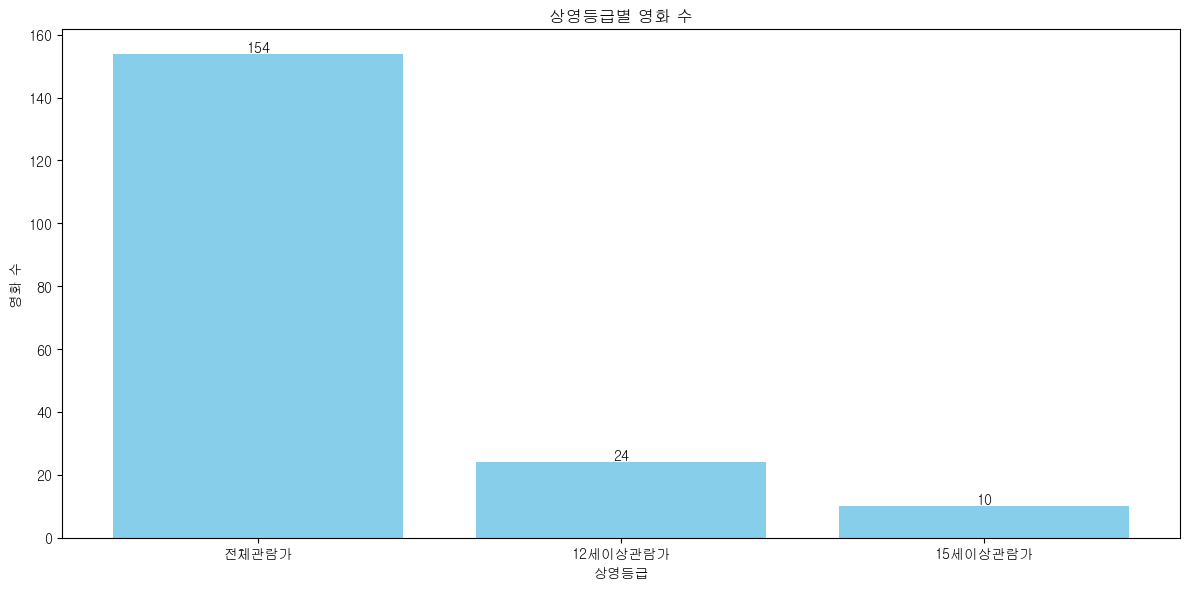

In [45]:
rating_counts = data['상영등급'].value_counts()

plt.figure(figsize=(12, 6))

bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('상영등급별 영화 수')
plt.xlabel('상영등급')
plt.ylabel('영화 수')

for bar, count in zip(bars, rating_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## B-2. 상영등급에 따른 평균 관객수

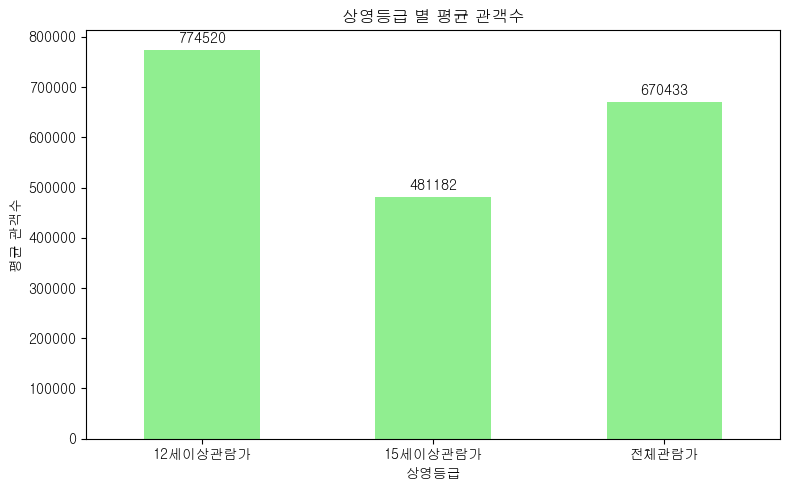

In [46]:
rating_mean_audience = data.groupby('상영등급')['관객수'].mean().sort_index()

plt.figure(figsize=(8, 5))
rating_mean_audience.plot(kind='bar', color='lightgreen')
plt.title('상영등급 별 평균 관객수')
plt.xlabel('상영등급')
plt.ylabel('평균 관객수')
plt.xticks(rotation=0)
plt.tight_layout()

for i, v in enumerate(rating_mean_audience):
    plt.text(i, v + 10000, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.show()

## B-3. 시리즈 & 원작 유무에 따른 평균 SNS 언급수

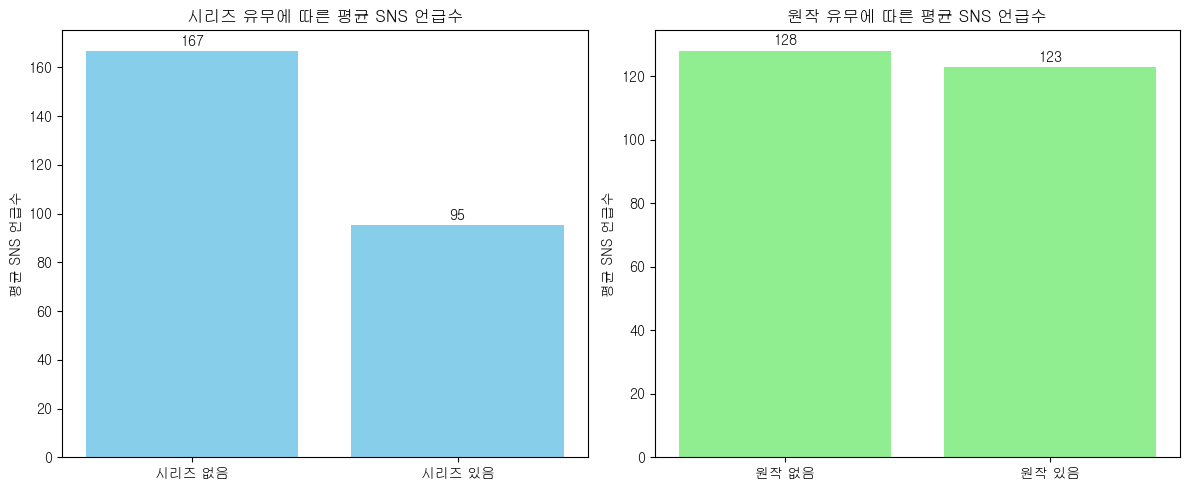

In [47]:
series_mean_mentions = data.groupby('시리즈')['총 언급수'].mean()

adaptation_mean_mentions = data.groupby('원작유무')['총 언급수'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['시리즈 없음', '시리즈 있음'], series_mean_mentions, color='skyblue')
ax1.set_title('시리즈 유무에 따른 평균 SNS 언급수')
ax1.set_ylabel('평균 SNS 언급수')

for i, v in enumerate(series_mean_mentions):
    ax1.text(i, v + 1, str(round(v)), ha='center', va='bottom', fontsize=10)

ax2.bar(['원작 없음', '원작 있음'], adaptation_mean_mentions, color='lightgreen')
ax2.set_title('원작 유무에 따른 평균 SNS 언급수')
ax2.set_ylabel('평균 SNS 언급수')

for i, v in enumerate(adaptation_mean_mentions):
    ax2.text(i, v + 1, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

## B-4. 시리즈 & 원작 유무에 따른 영화 수

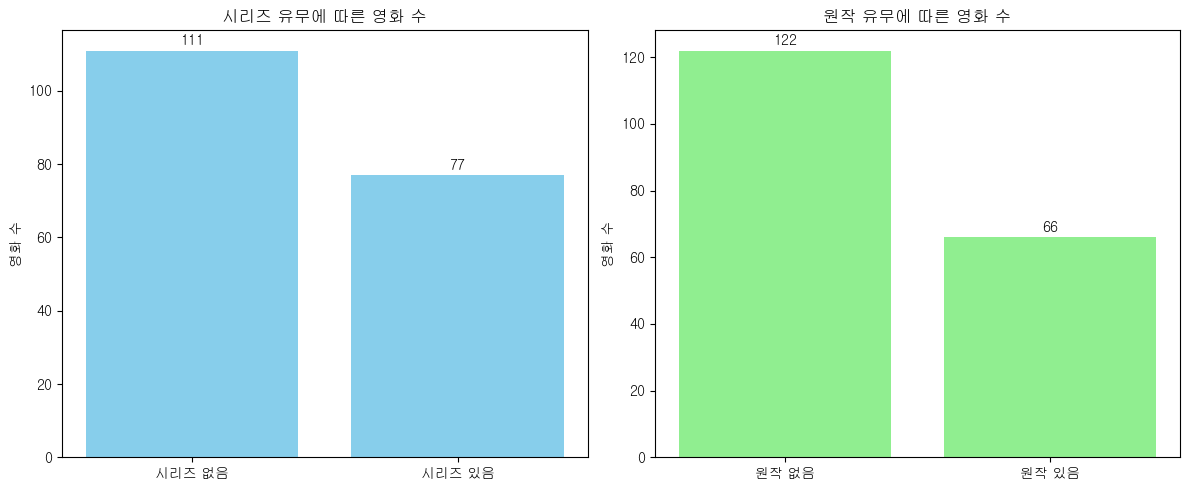

In [48]:
series_counts = data['시리즈'].value_counts()

adaptation_counts = data['원작유무'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['시리즈 없음', '시리즈 있음'], series_counts.values, color='skyblue')
ax1.set_title('시리즈 유무에 따른 영화 수')
ax1.set_ylabel('영화 수')

for i, v in enumerate(series_counts.values):
    ax1.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

ax2.bar(['원작 없음', '원작 있음'], adaptation_counts.values, color='lightgreen')
ax2.set_title('원작 유무에 따른 영화 수')
ax2.set_ylabel('영화 수')

for i, v in enumerate(adaptation_counts.values):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

## B-5. 시리즈 & 원작 유무에 따른 평균 관객수

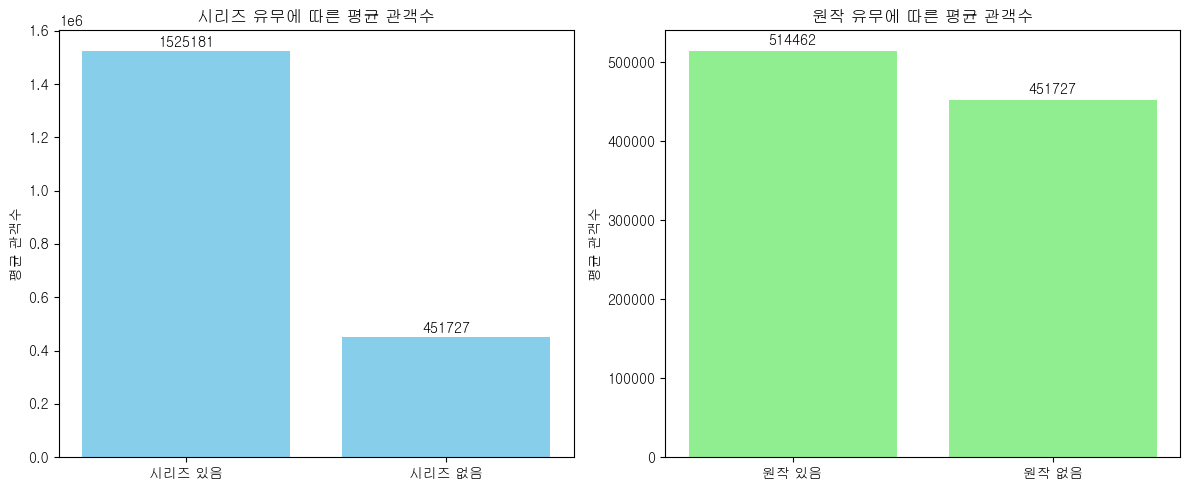

In [49]:
grouped = data.groupby(['시리즈', '원작유무'])['관객수'].mean().reset_index()

series_yes = grouped[grouped['시리즈'] == 1]['관객수']
series_no = grouped[grouped['시리즈'] == 0]['관객수']

adaptation_yes = grouped[grouped['원작유무'] == 1]['관객수']
adaptation_no = grouped[grouped['원작유무'] == 0]['관객수']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['시리즈 있음', '시리즈 없음'], series_yes, color='skyblue')
ax1.set_title('시리즈 유무에 따른 평균 관객수')
ax1.set_ylabel('평균 관객수')

for i, v in enumerate(series_yes):
    ax1.text(i, v + 5000, str(round(v)), ha='center', va='bottom', fontsize=10)

ax2.bar(['원작 있음', '원작 없음'], adaptation_yes, color='lightgreen')
ax2.set_title('원작 유무에 따른 평균 관객수')
ax2.set_ylabel('평균 관객수')

for i, v in enumerate(adaptation_yes):
    ax2.text(i, v + 5000, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

## B-6. 상영시간에 따른 관객수 그래프

- 단편 : 40분 미만
- 중편 : 40분 이상 80분 미만
- 장편 : 80분 이상 120분 미만
- 초장편 : 120분 이상

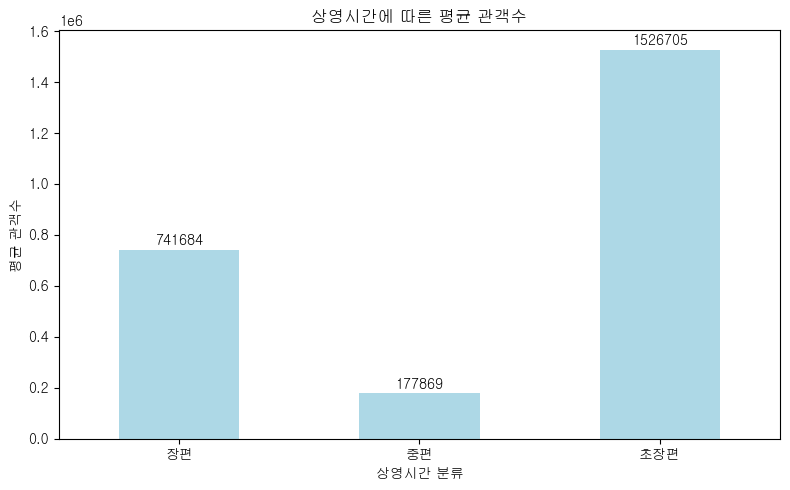

In [50]:
def classify_runtime_category(runtime):
    if runtime <= 40:
        return '단편'
    elif runtime > 40 and runtime <= 80:
        return '중편'
    elif runtime > 80 and runtime < 120:
        return '장편'
    else:
        return '초장편'

data['상영시간 분류'] = data['상영시간'].apply(classify_runtime_category)

runtime_mean_audience = data.groupby('상영시간 분류')['관객수'].mean()

plt.figure(figsize=(8, 5))
runtime_mean_audience.plot(kind='bar', color='lightblue')
plt.title('상영시간에 따른 평균 관객수')
plt.xlabel('상영시간 분류')
plt.ylabel('평균 관객수')
plt.xticks(rotation=0)
plt.tight_layout()

for i, v in enumerate(runtime_mean_audience):
    plt.text(i, v + 10000, str(round(v)), ha='center', va='bottom', fontsize=10)

plt.show()

## B-7. SNS 언급수에 따른 관객수 산점도 그래프

### B-7-1. Total Scatter Plot

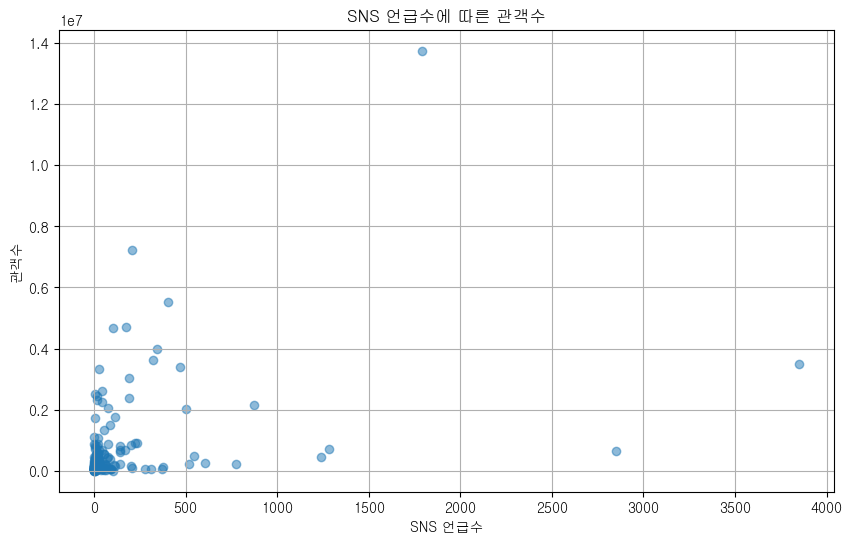

In [51]:
total_mentions = data['총 언급수']
audience_count = data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(total_mentions, audience_count, alpha=0.5)
plt.title('SNS 언급수에 따른 관객수')
plt.xlabel('SNS 언급수')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

### B-7-2. Q3 Scatter Plot

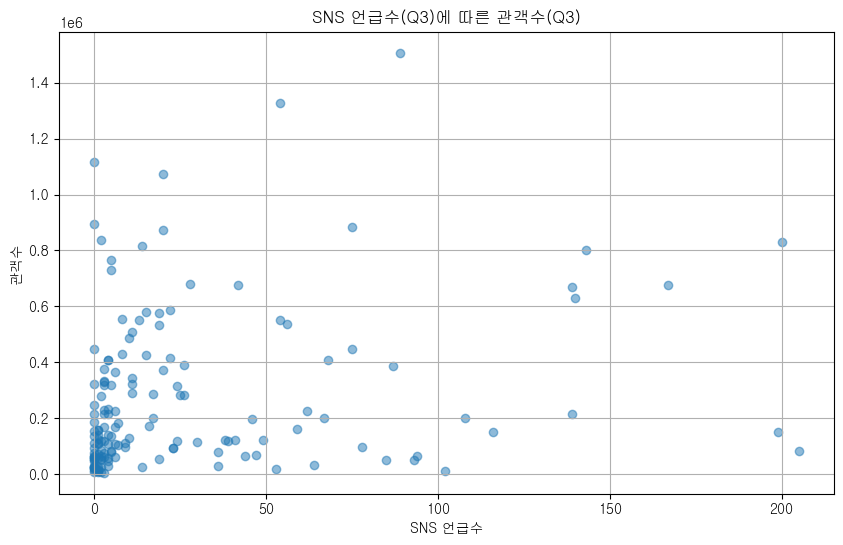

In [52]:
total_mentions = data['총 언급수']
audience_count = data['관객수']

filtered_data = data[(data['총 언급수'] <= 212) & (data['관객수'] <= 1539831)]
filtered_mentions = filtered_data['총 언급수']
filtered_audience = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_mentions, filtered_audience, alpha=0.5)
plt.title('SNS 언급수(Q3)에 따른 관객수(Q3)')
plt.xlabel('SNS 언급수')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

## B-8. 영화 작품성(평론가 평점)에 대한 관객수 산점도 그래프

### B-8-1. Total Scatter Plot

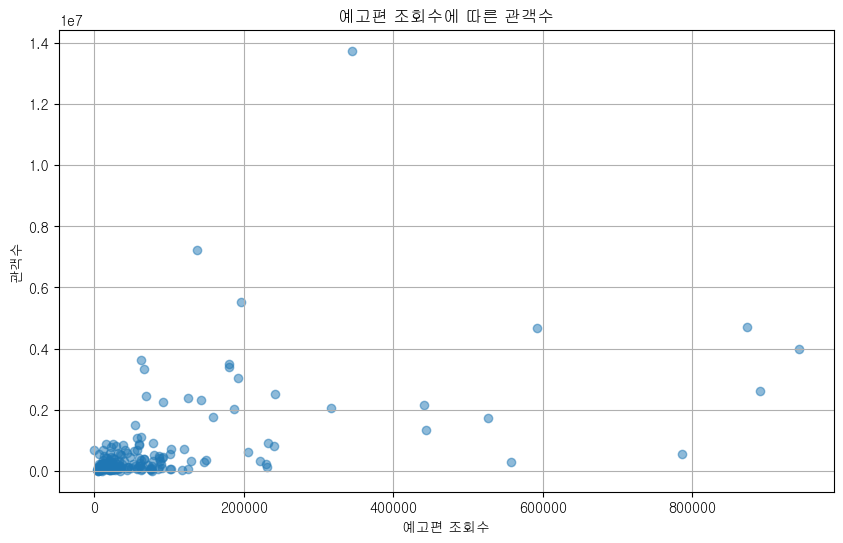

In [53]:
teaser_hit = data['조회수']
audience_count = data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit, audience_count, alpha=0.5)
plt.title('예고편 조회수에 따른 관객수')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()

### B-8-2. 평론가 평점(0점 제외)에 대한 관객수(Q3) Scatter Plot

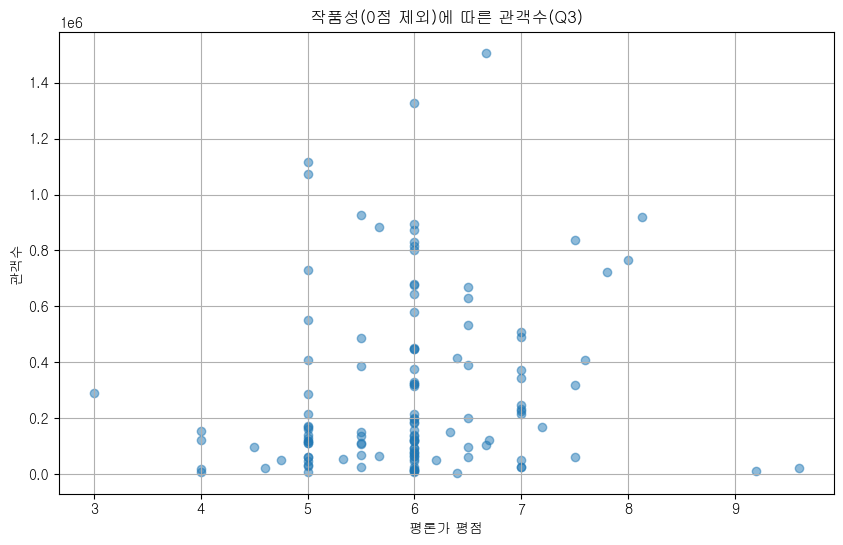

In [54]:
filtered_data = data[(data['평론가 평점'] >= 0.1)& (data['관객수'] <= 1.539831e+06)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['평론가 평점'], filtered_data['관객수'], alpha=0.5)

plt.title('작품성(0점 제외)에 따른 관객수(Q3)')
plt.xlabel('평론가 평점')
plt.ylabel('관객수')

plt.grid(True)
plt.show()

## B-9. 예고편 조회수에 따른 관객수

### B-9-1. Total Scatter Plot

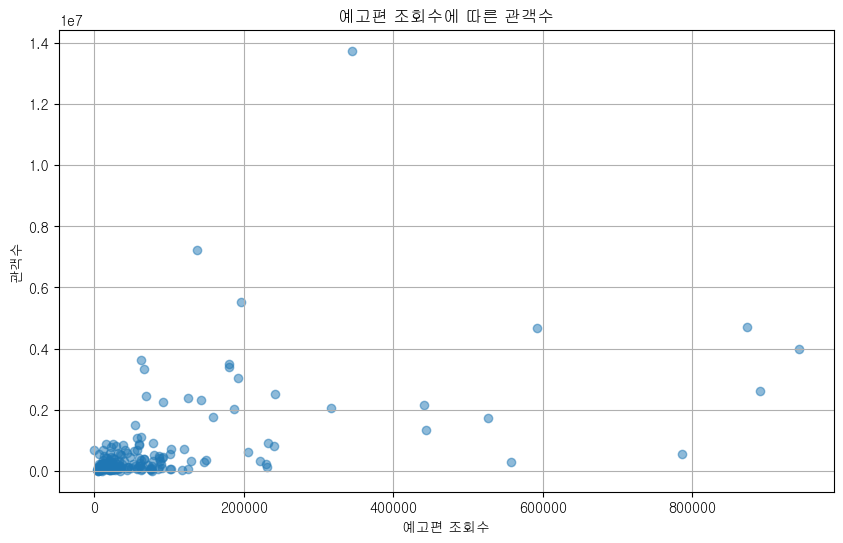

In [55]:
### B-10-1. Total Scatter Plot
### B-10-1. Total Scatter Plot
teaser_hit = data['조회수']
audience_count = data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit, audience_count, alpha=0.5)
plt.title('예고편 조회수에 따른 관객수')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()


### B-9-2. 예고편 조회수(Q3)에 대한 관객수(Q3) Scatter Plot

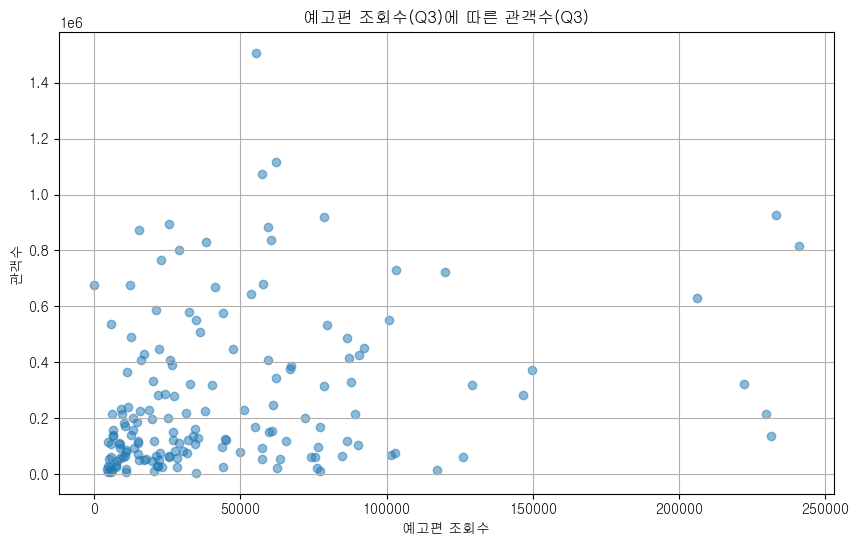

In [56]:
filtered_data = data[(data['조회수'] < 326136) & (data['관객수'] < 1539831)]

teaser_hit_filtered = filtered_data['조회수']
audience_count_filtered = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit_filtered, audience_count_filtered, alpha=0.5)
plt.title('예고편 조회수(Q3)에 따른 관객수(Q3)')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()

### B-9-3. 예고편 조회수(Q2)에 대한 관객수(Q2) Scatter Plot

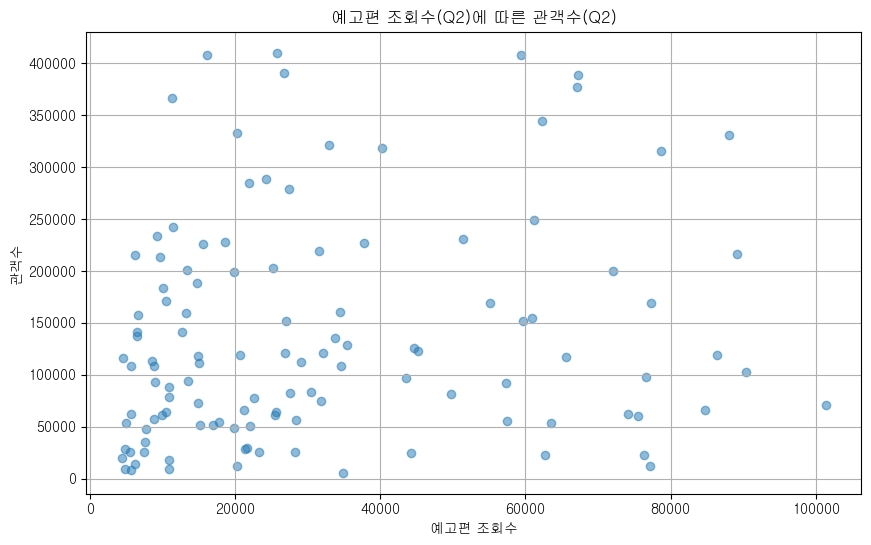

In [57]:
filtered_data = data[(data['조회수'] < 102834) & (data['관객수'] < 412843)]

teaser_hit_filtered = filtered_data['조회수']
audience_count_filtered = filtered_data['관객수']

plt.figure(figsize=(10, 6))
plt.scatter(teaser_hit_filtered, audience_count_filtered, alpha=0.5)
plt.title('예고편 조회수(Q2)에 따른 관객수(Q2)')
plt.xlabel('예고편 조회수')
plt.ylabel('관객수')
plt.grid(True)

plt.show()

## B-10. QQ Plot

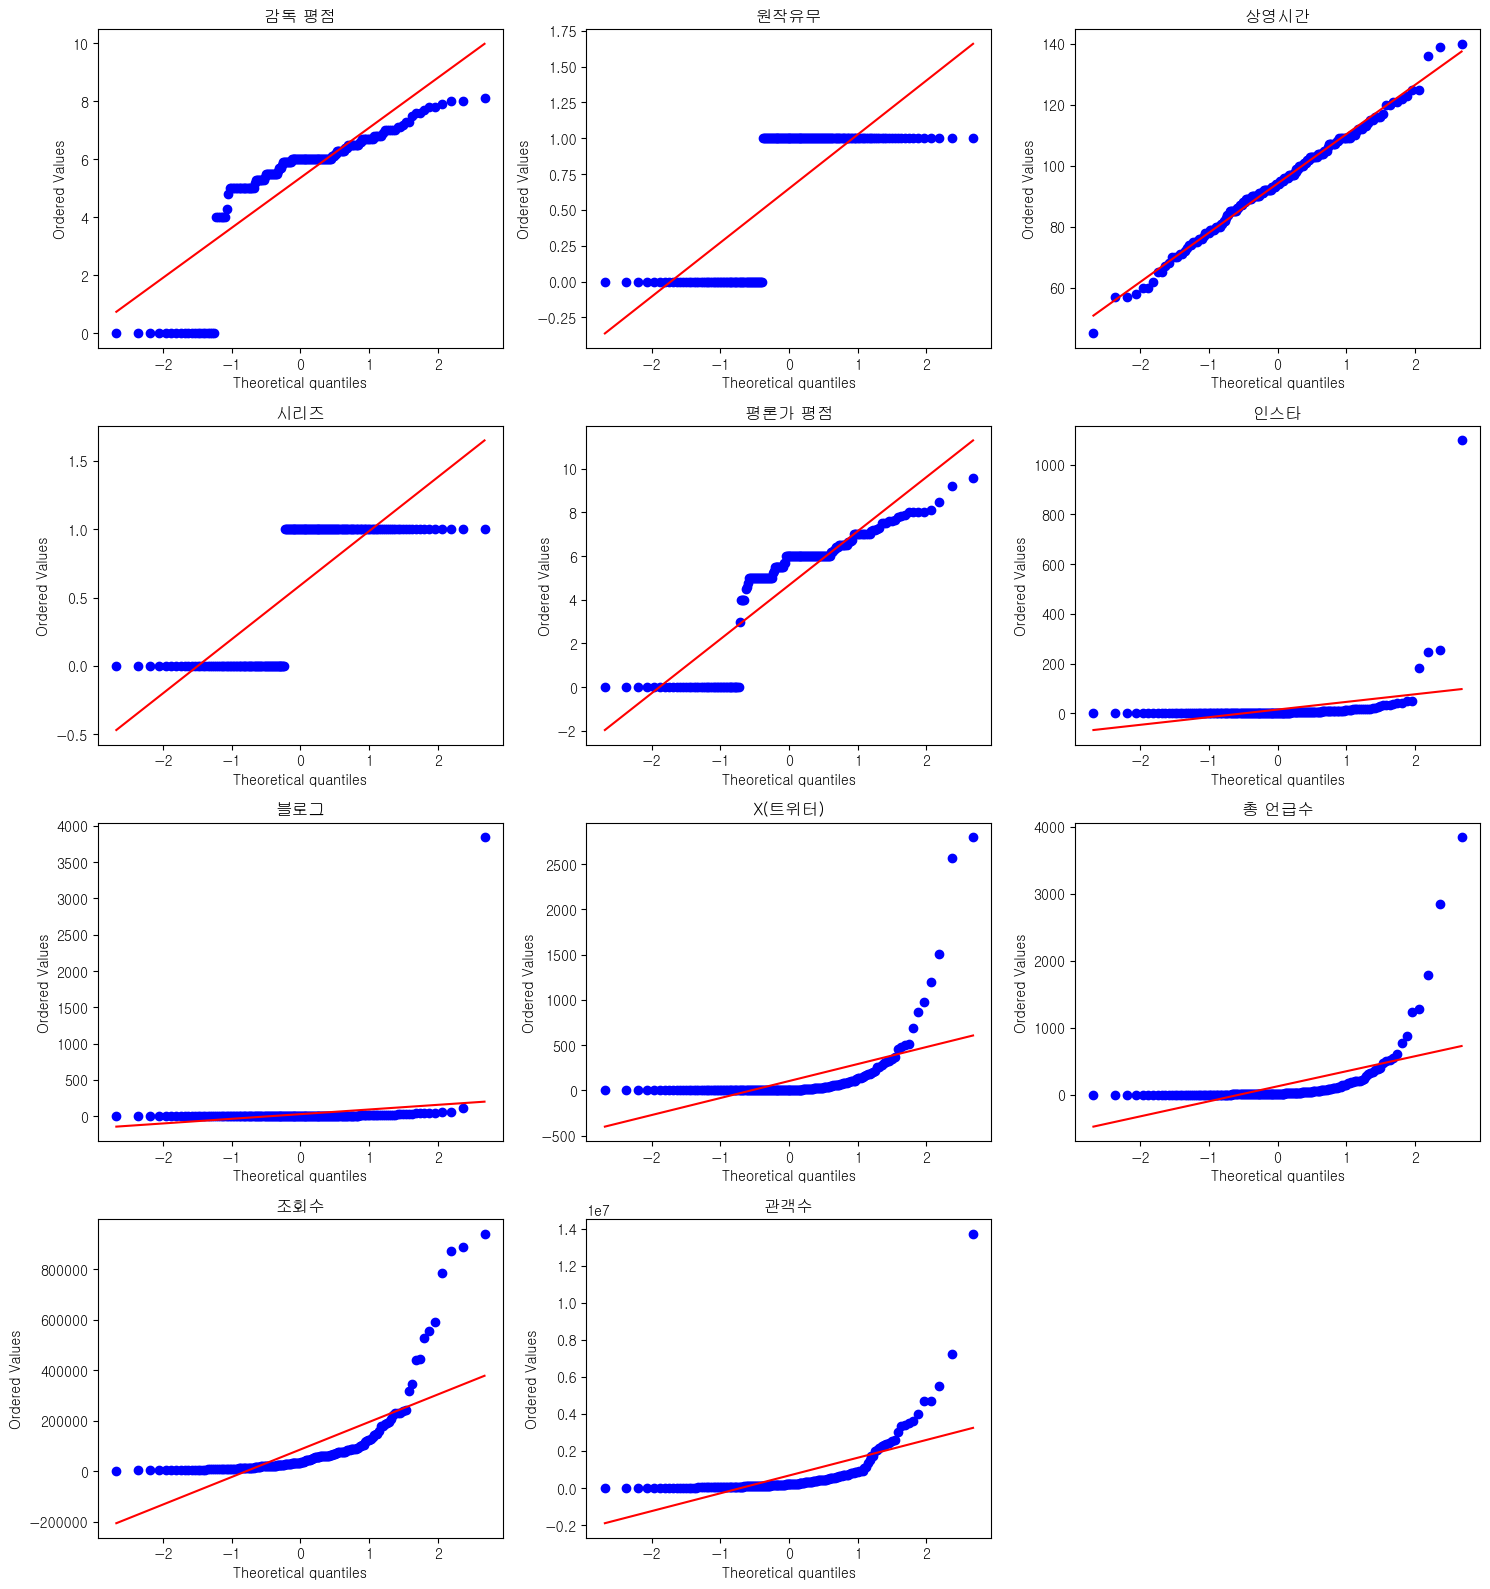

In [58]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

num_numeric_plots = len(numeric_data.columns)
num_rows = num_numeric_plots // 3 + (num_numeric_plots % 3 > 0)

plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(numeric_data.columns):
    plt.subplot(num_rows, 3, i + 1)
    stats.probplot(numeric_data[col].dropna(), dist="norm", plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()

## B-11. Box Plot

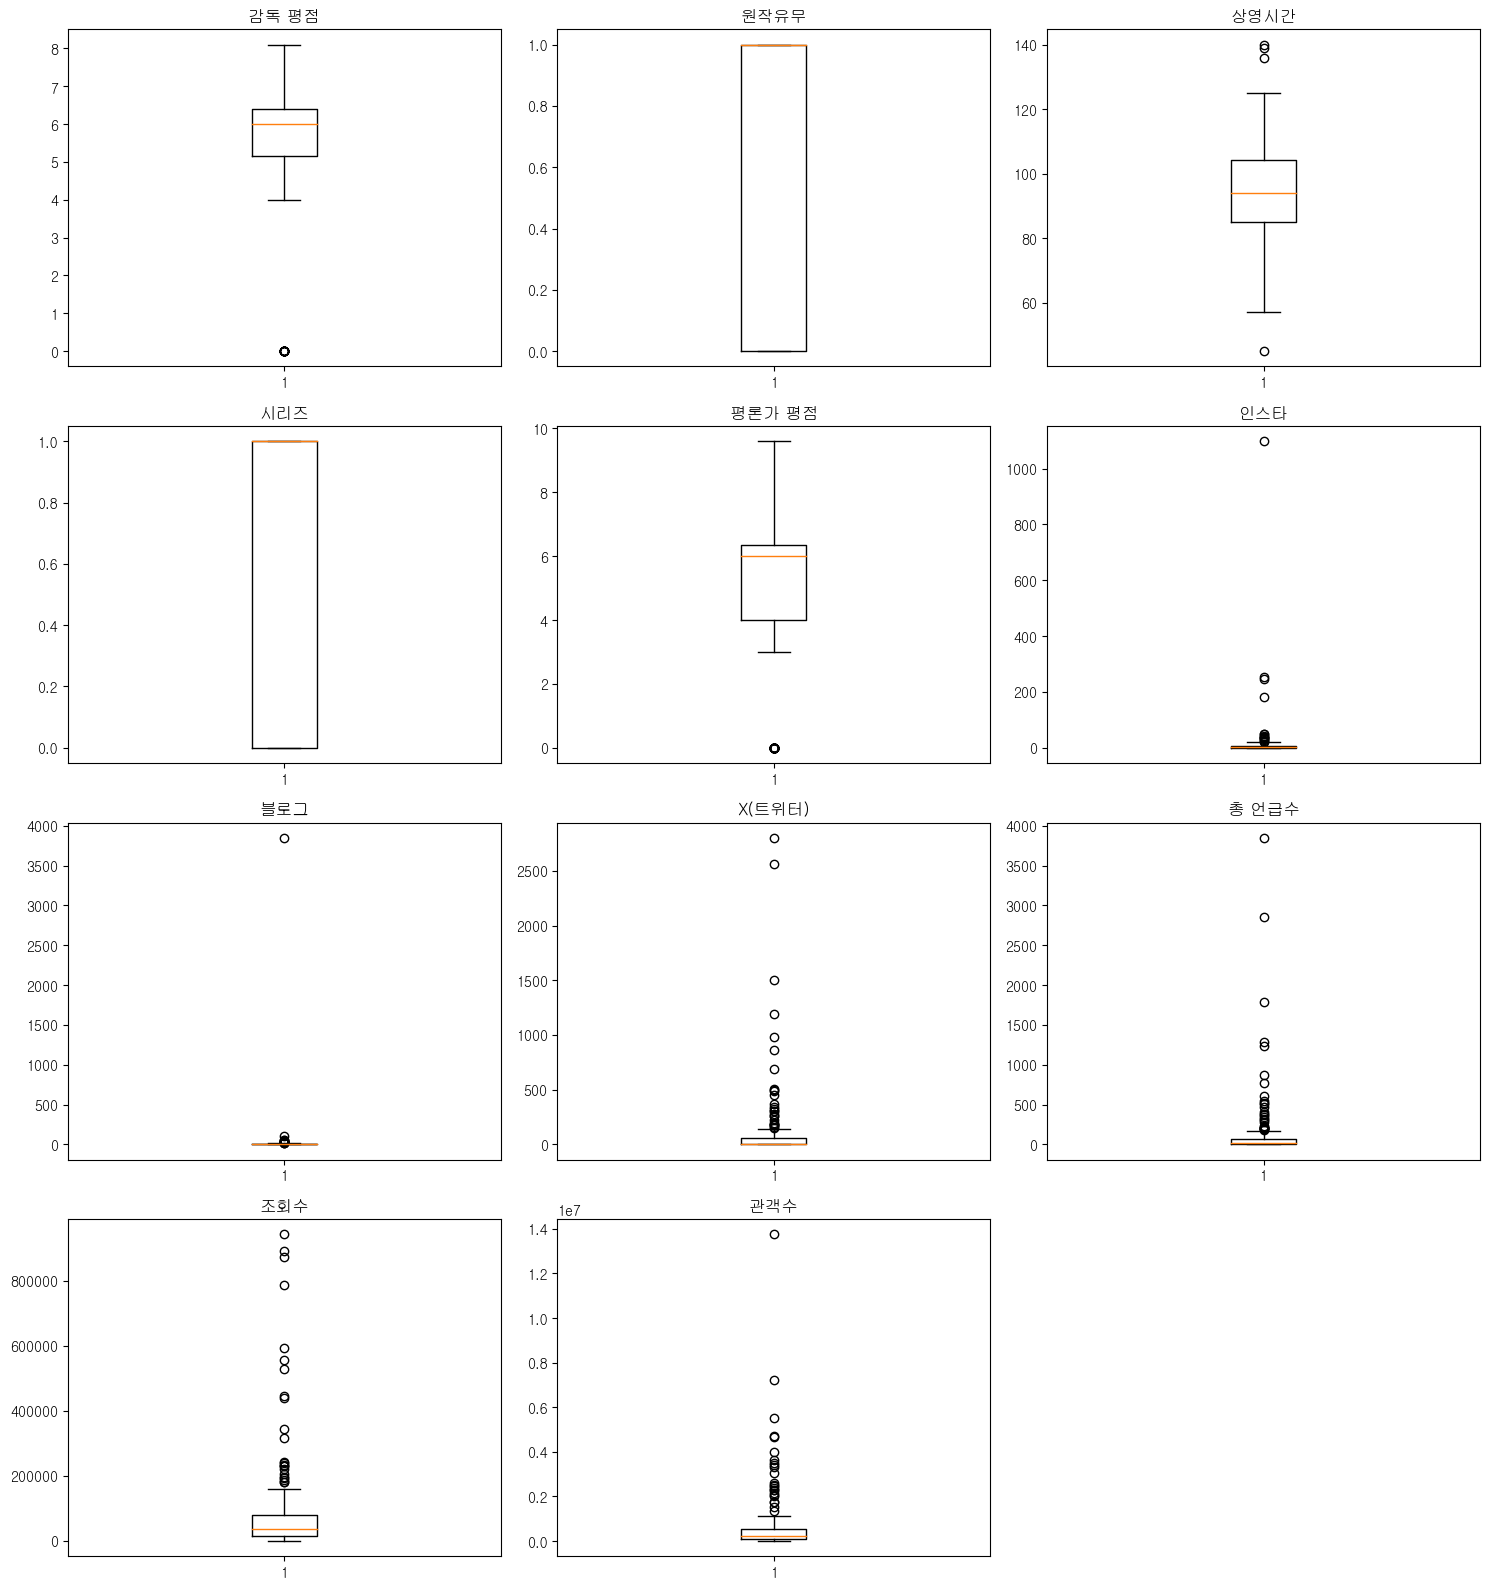

In [59]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

num_plots = len(numeric_data.columns)
rows = num_plots // 3 + (num_plots % 3 > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_data.columns):
    plt.subplot(rows, 3, i + 1)
    plt.boxplot(numeric_data[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

# C. 다변량 분석

In [60]:
data = pd.read_excel("animation_encoded.xlsx")

## C-1. 산점도 행렬

In [61]:
data.head()

,영화명,개봉일,감독 평점,원작유무,상영시간,시리즈,평론가 평점,인스타,블로그,X(트위터),총 언급수,조회수,관객수,상영등급
0,굿 다이노,2016-01-07,6.7,0,101,0,6.00,5,7,42,54,444148,1328394,0
1,쿵푸팬더3,2016-01-28,5.7,0,95,1,5.50,11,14,320,345,942185,3984812,0
2,앨빈과 슈퍼밴드: 악동 어드벤처,2016-02-04,4.8,1,92,1,3.00,2,4,5,11,557308,289645,0
3,주토피아,2016-02-17,6.8,0,108,1,7.25,7,8,160,175,873261,4703245,0
4,극장판 프랭키와 친구들: 생명의 나무,2016-04-13,0.0,1,72,1,0.00,0,1,0,1,28354,56835,0


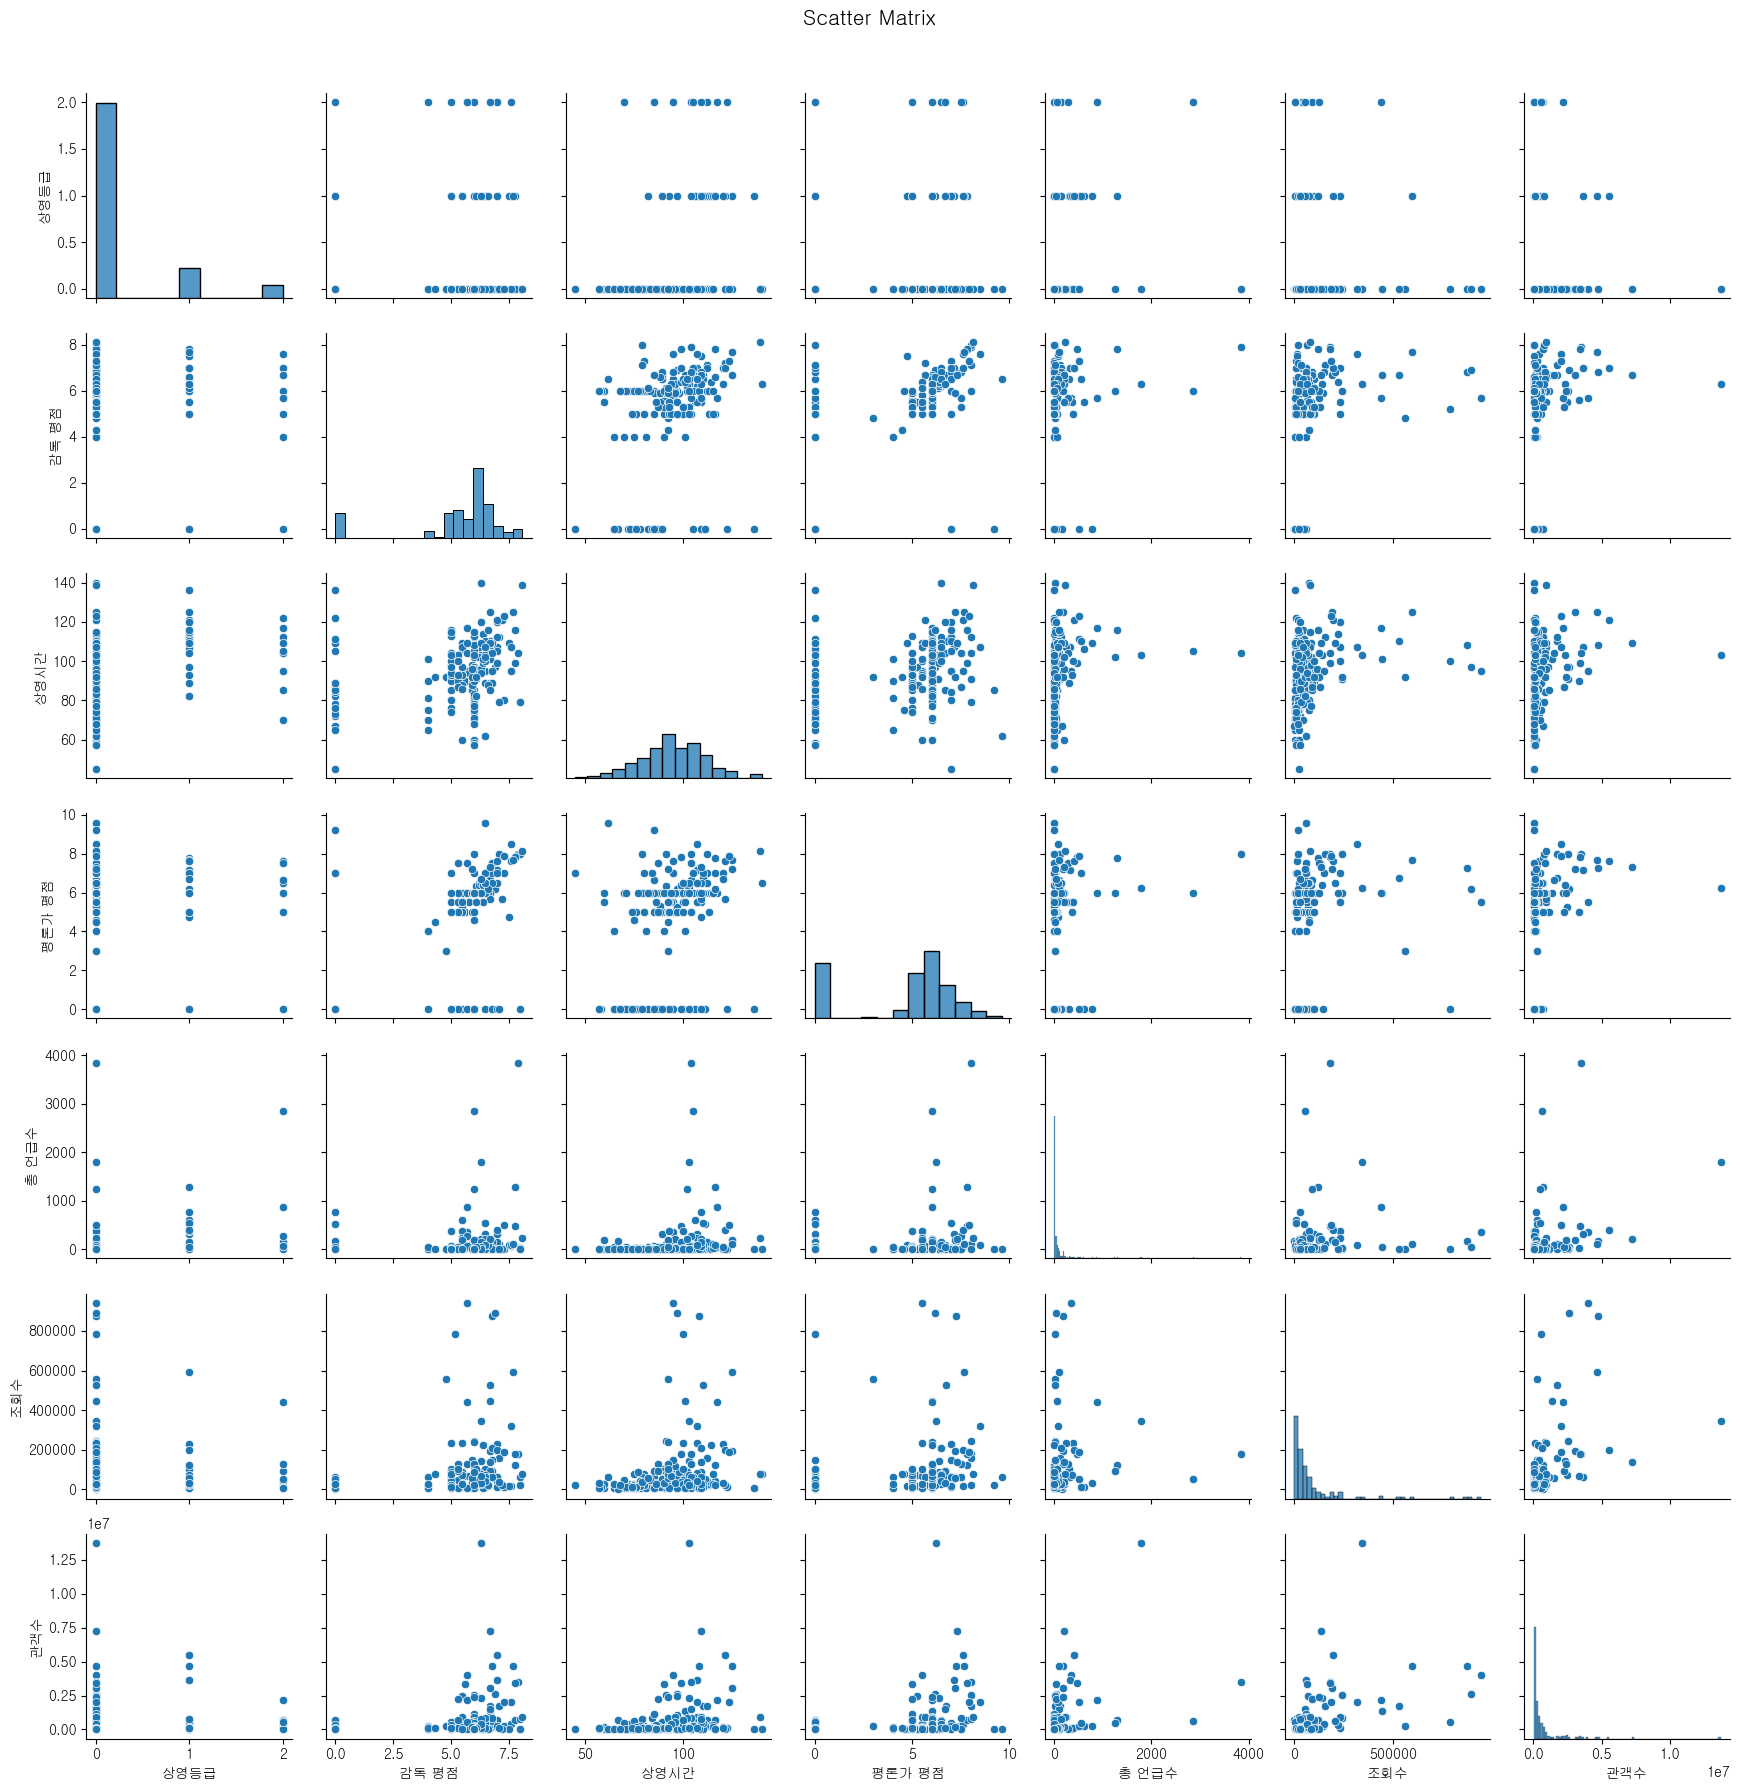

In [62]:
numeric_columns = ['상영등급', '감독 평점', '상영시간', '평론가 평점', '총 언급수', '조회수', '관객수']

sns.pairplot(data[numeric_columns])
plt.suptitle('Scatter Matrix', y=1.02, fontsize=15)
plt.tight_layout()

plt.show()

## C-2. 히트맵

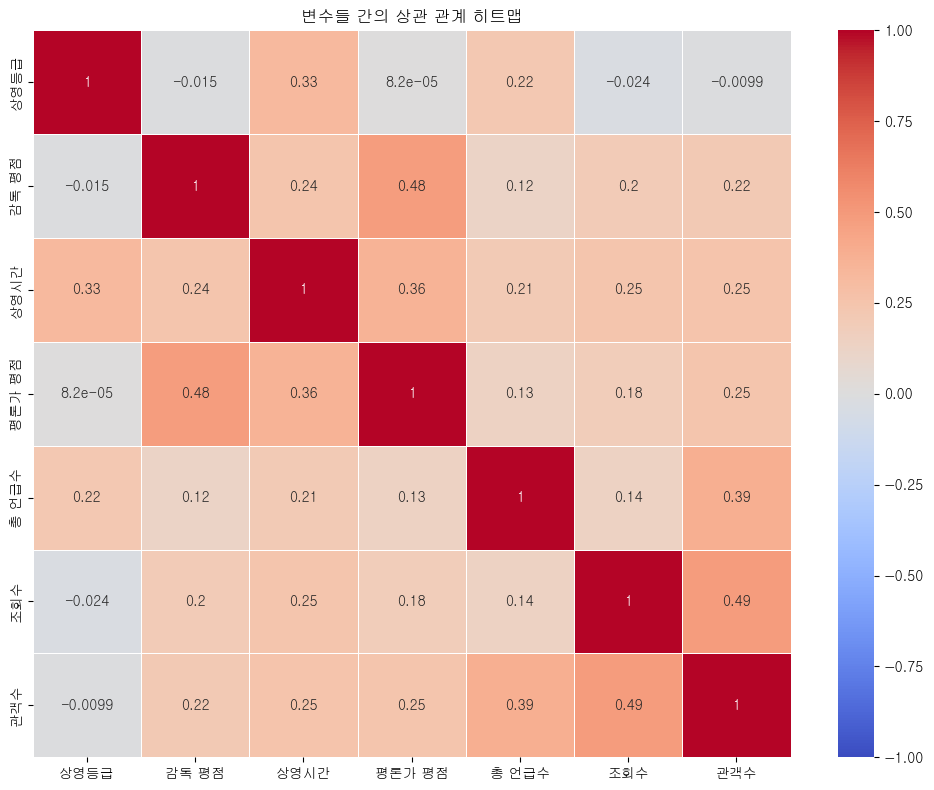

In [63]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('변수들 간의 상관 관계 히트맵')
plt.tight_layout()

plt.show()